# Exploratory data analysis for the health status of bees used for hive and weather prediction.

### Data provided by Jocelyn Doumlau.

## Standard package imports

In [31]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#matplotlib.style.use("Solarize_Light2")
matplotlib.style.use("ggplot")

import matplotlib.font_manager as fm

%matplotlib inline
from scipy.stats import chi2_contingency
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rcParams

# Data description

## 1. Apiary data（Apiary_Information.csv）                                                                 
### ApiaryID
### Apiary
### City
### State

## 2.Hive health status（HCC_Inspections.csv）
### InspectionID
### HiveID
### InsptDate
### Brood
### Bees
### Queen
### Food
### Stressors
### Space
### Percent_Met
### Healthy

## 3.Beehive information dataset analysis（Hive_Information.csv）
### HiveID
### Hive_Tag
### ApiaryID

## 4.Hourly weather observation records(Hourly_Weather.csv)
### WeatherID, ObsID, StationID
### Temperature
### Humidity
### Dew_Point
### Wind_Direction
### Wind_Speed
### Wind_Gust
### Pressure
### Precip
### Condition
### Sunrise, Sunset
### Daylight_Hours

## 5.Records of meteorological observations(Weather_Observations.csv)
### ObsID
### Data
### Obs_Time
### Obs_Hour

## 6.(Weather_Stations.csv)
### StationID
### Station_City
### Station

In [32]:
DATA_DIR = "./data"

In [33]:
import os
print(os.path.abspath(DATA_DIR))  # Output absolute path

C:\Users\lenovo\course project\data


In [34]:
#Read the dataset
Apiary_Information_df = pd.read_csv(f"{DATA_DIR}/Apiary_Information.csv")
HCC_Inspections_df = pd.read_csv(f"{DATA_DIR}/HCC_Inspections.csv")
Hive_Information_df = pd.read_csv(f"{DATA_DIR}/Hive_Information.csv")
Hourly_Weather_df = pd.read_csv(f"{DATA_DIR}/Hourly_Weather.csv")
Weather_Observations_df = pd.read_csv(f"{DATA_DIR}/Weather_Observations.csv")
Weather_Stations_df = pd.read_csv(f"{DATA_DIR}/Weather_Stations.csv")

# Use a more flexible method of date parsing
HCC_Inspections_df['InsptDate'] = pd.to_datetime(
    HCC_Inspections_df['InsptDate'], 
    errors='coerce',  
    format='mixed'    
)

# Check if there is a date when the conversion failed
if HCC_Inspections_df['InsptDate'].isna().any():
    na_count = HCC_Inspections_df['InsptDate'].isna().sum()
    print(f"Warnings: find {na_count} The date that could not be resolved")

# Sort by date and hive ID
HCC_Inspections_df.sort_values(
    ['InsptDate', 'HiveID'], 
    inplace=True, 
    ignore_index=True
)

print(HCC_Inspections_df.head())

Warnings: find 2 The date that could not be resolved
   InpsectionID  HiveID  InsptDate  Brood  Bees  Queen  Food  Stressors  \
0          1498     124 2016-02-29    1.0   1.0    0.0   1.0        1.0   
1          1502     125 2016-02-29    1.0   1.0    1.0   1.0        1.0   
2          1530     127 2016-02-29    1.0   1.0    1.0   1.0        1.0   
3          1075      80 2016-03-01    1.0   1.0    1.0   1.0        1.0   
4           118       7 2016-03-08    1.0   1.0    1.0   1.0        0.0   

   Space  Percent_Met Healthy  
0    1.0           83      No  
1    1.0          100     Yes  
2    1.0          100     Yes  
3    1.0          100     Yes  
4    1.0           83      No  


# Apiary_Information

In [35]:
print(f"Shape of the Apiary_Information: {Apiary_Information_df.shape}")
print("\n")
Apiary_Information_df.head()

Shape of the Apiary_Information: (13, 4)




,ApiaryID,Apiary,City,State
0,1,BBCC,Durham,NC
1,2,BBCC-RTP,Durham,NC
2,3,BBTS,Clayton,NC
3,4,Beesboro,Durham,NC
4,5,Fresno,Durham,NC


In [6]:
# Filter for rows whose state is NC
nc_Apiary_Information_df = Apiary_Information_df[Apiary_Information_df['State'] == 'NC']
nc_Apiary_Information_df.head()

,ApiaryID,Apiary,City,State
0,1,BBCC,Durham,NC
1,2,BBCC-RTP,Durham,NC
2,3,BBTS,Clayton,NC
3,4,Beesboro,Durham,NC
4,5,Fresno,Durham,NC


In [7]:
# Filter for rows whose state is NC
nc_Apiary_Information_df = Apiary_Information_df[Apiary_Information_df['State'] == 'NC']
nc_Apiary_Information_df.head(10)

,ApiaryID,Apiary,City,State
0,1,BBCC,Durham,NC
1,2,BBCC-RTP,Durham,NC
2,3,BBTS,Clayton,NC
3,4,Beesboro,Durham,NC
4,5,Fresno,Durham,NC
5,6,Juniper Level,Durham,NC
7,8,Leesville,Durham,NC
10,11,The Bee Hive,Clayton,NC


In [8]:
# Filter for rows whose state is UT
UT_Apiary_Information_df = Apiary_Information_df[Apiary_Information_df['State'] == 'UT']
UT_Apiary_Information_df.head(10)

,ApiaryID,Apiary,City,State
6,7,Lakeview,Salt Lake City,UT
8,9,Mike C,Salt Lake City,UT
9,10,Roestenburg,Salt Lake City,UT
11,12,Walker - Avenue,Salt Lake City,UT
12,13,Walker-Cove,Salt Lake City,UT


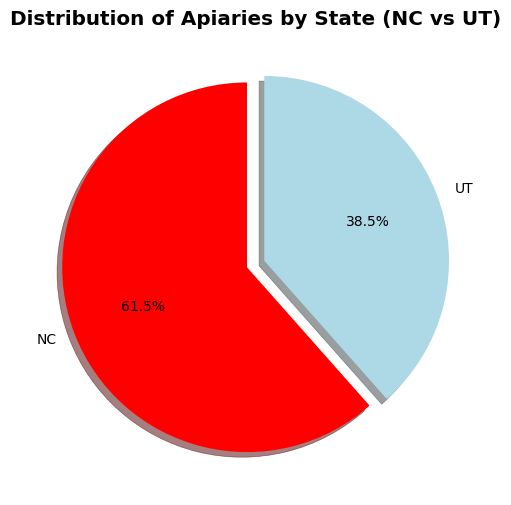

In [9]:
# Count the number of NCs and UTs
state_counts = Apiary_Information_df['State'].value_counts()

# Screening retains only NC and UT (to avoid interference from other states）
state_counts = state_counts[state_counts.index.isin(['NC', 'UT'])]

colors = ['red', 'lightblue']

plt.figure(figsize=(8, 6))
plt.pie(
    state_counts,
    labels=state_counts.index,
    autopct='%1.1f%%',  
    colors=colors,
    startangle=90,       
    shadow=True,         
    explode=(0.05, 0.05) 
)

plt.title('Distribution of Apiaries by State (NC vs UT)', fontweight='bold')

plt.show()

# HCC_Inspections

### What is the duration of the data?

In [37]:
# Convert InsptDate to datetime format
HCC_Inspections_df['InsptDate'] = pd.to_datetime(HCC_Inspections_df['InsptDate'])

# Basic statistics of the date column
print("Date column statistics:")
print(HCC_Inspections_df['InsptDate'].describe())

# Earliest and latest inspection dates
print("\nEarliest inspection date:", HCC_Inspections_df['InsptDate'].min())
print("Latest inspection date:", HCC_Inspections_df['InsptDate'].max())

# Time span of inspection dates
print("Time span of inspection dates:", HCC_Inspections_df['InsptDate'].max() - HCC_Inspections_df['InsptDate'].min())

# Number of inspections per year
print("\nNumber of inspections per year:")
print(HCC_Inspections_df['InsptDate'].dt.year.value_counts().sort_index())


Date column statistics:
count                             2402
mean     2017-10-01 15:04:02.797668608
min                2016-02-29 00:00:00
25%                2017-04-11 00:00:00
50%                2017-09-12 12:00:00
75%                2018-06-11 00:00:00
max                2019-08-29 00:00:00
Name: InsptDate, dtype: object

Earliest inspection date: 2016-02-29 00:00:00
Latest inspection date: 2019-08-29 00:00:00
Time span of inspection dates: 1277 days 00:00:00

Number of inspections per year:
InsptDate
2016.0    470
2017.0    942
2018.0    932
2019.0     58
Name: count, dtype: int64


### It seems that the data is having hourly frequency.
### Let's check if there are missing rows.

In [38]:
cleaned_df = HCC_Inspections_df.dropna()  # Drop rows with NaN values
cleaned_df = cleaned_df[cleaned_df != ""].dropna()  # Also drop rows with empty strings

In [39]:
def check_null(df):
    # Check for NaN and empty strings ("")
    null_stats = (df.isna().sum() + (df == "").sum()) * 100 / len(df)
    return null_stats

null_percentages = check_null(HCC_Inspections_df)
print(null_percentages)


InpsectionID    0.000000
HiveID          0.000000
InsptDate       0.083195
Brood           0.665557
Bees            0.665557
Queen           0.665557
Food            0.166389
Stressors       0.623960
Space           0.665557
Percent_Met     0.000000
Healthy         0.000000
dtype: float64


### There are no missing values in the data

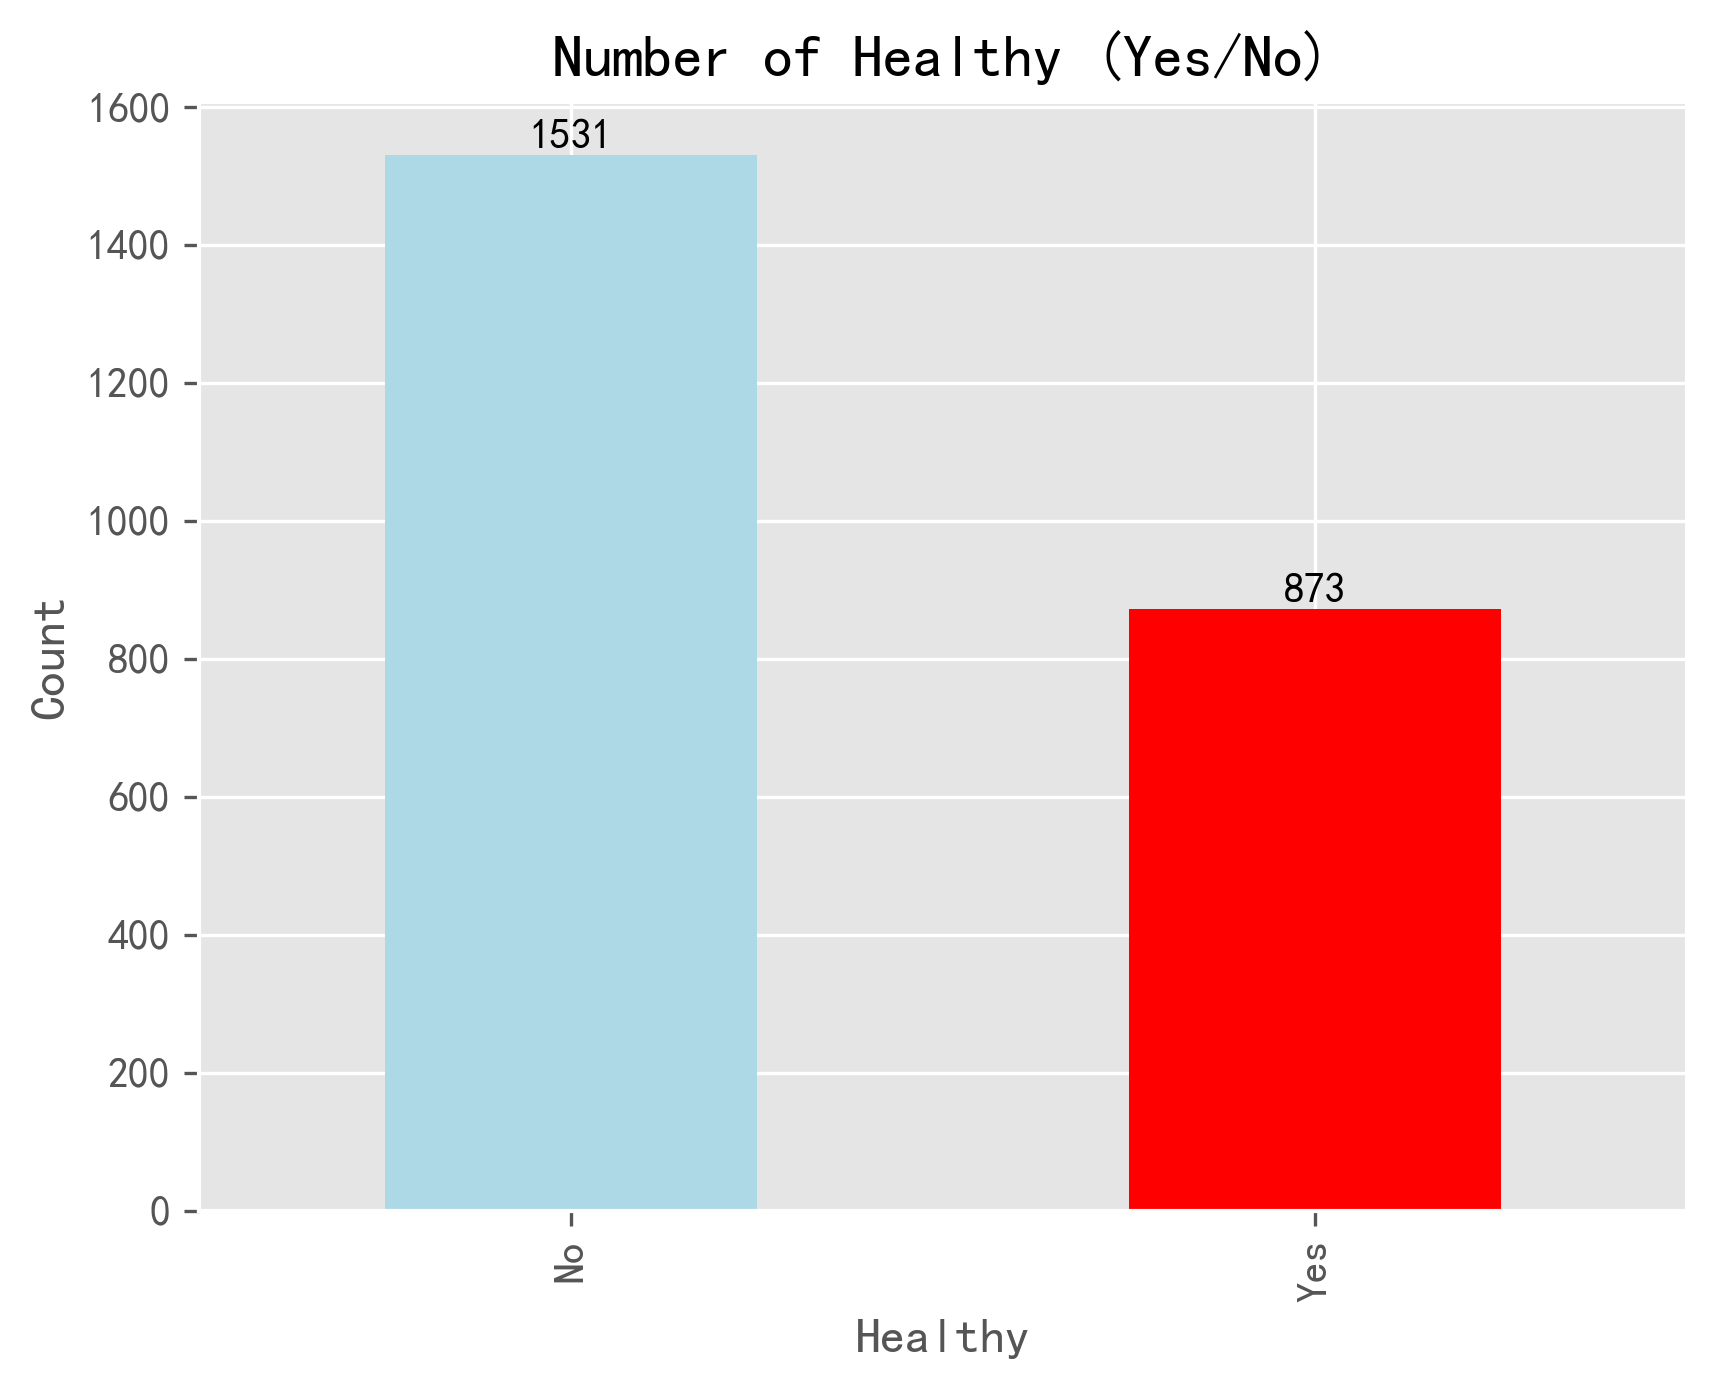

In [40]:
# Count the number of 'Yes' and 'No' in the 'Healthy' column
healthy_counts = HCC_Inspections_df['Healthy'].value_counts()

# Plot a bar chart
healthy_counts.plot(kind='bar', color=['lightblue', 'red'])

# Add chart title and axis labels
plt.title('Number of Healthy (Yes/No)')
plt.xlabel('Healthy')
plt.ylabel('Count')

# Add value labels on top of each bar
for i, count in enumerate(healthy_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

# Display the chart
plt.show()


### Trends in colony health over time

<Figure size 3600x1800 with 0 Axes>

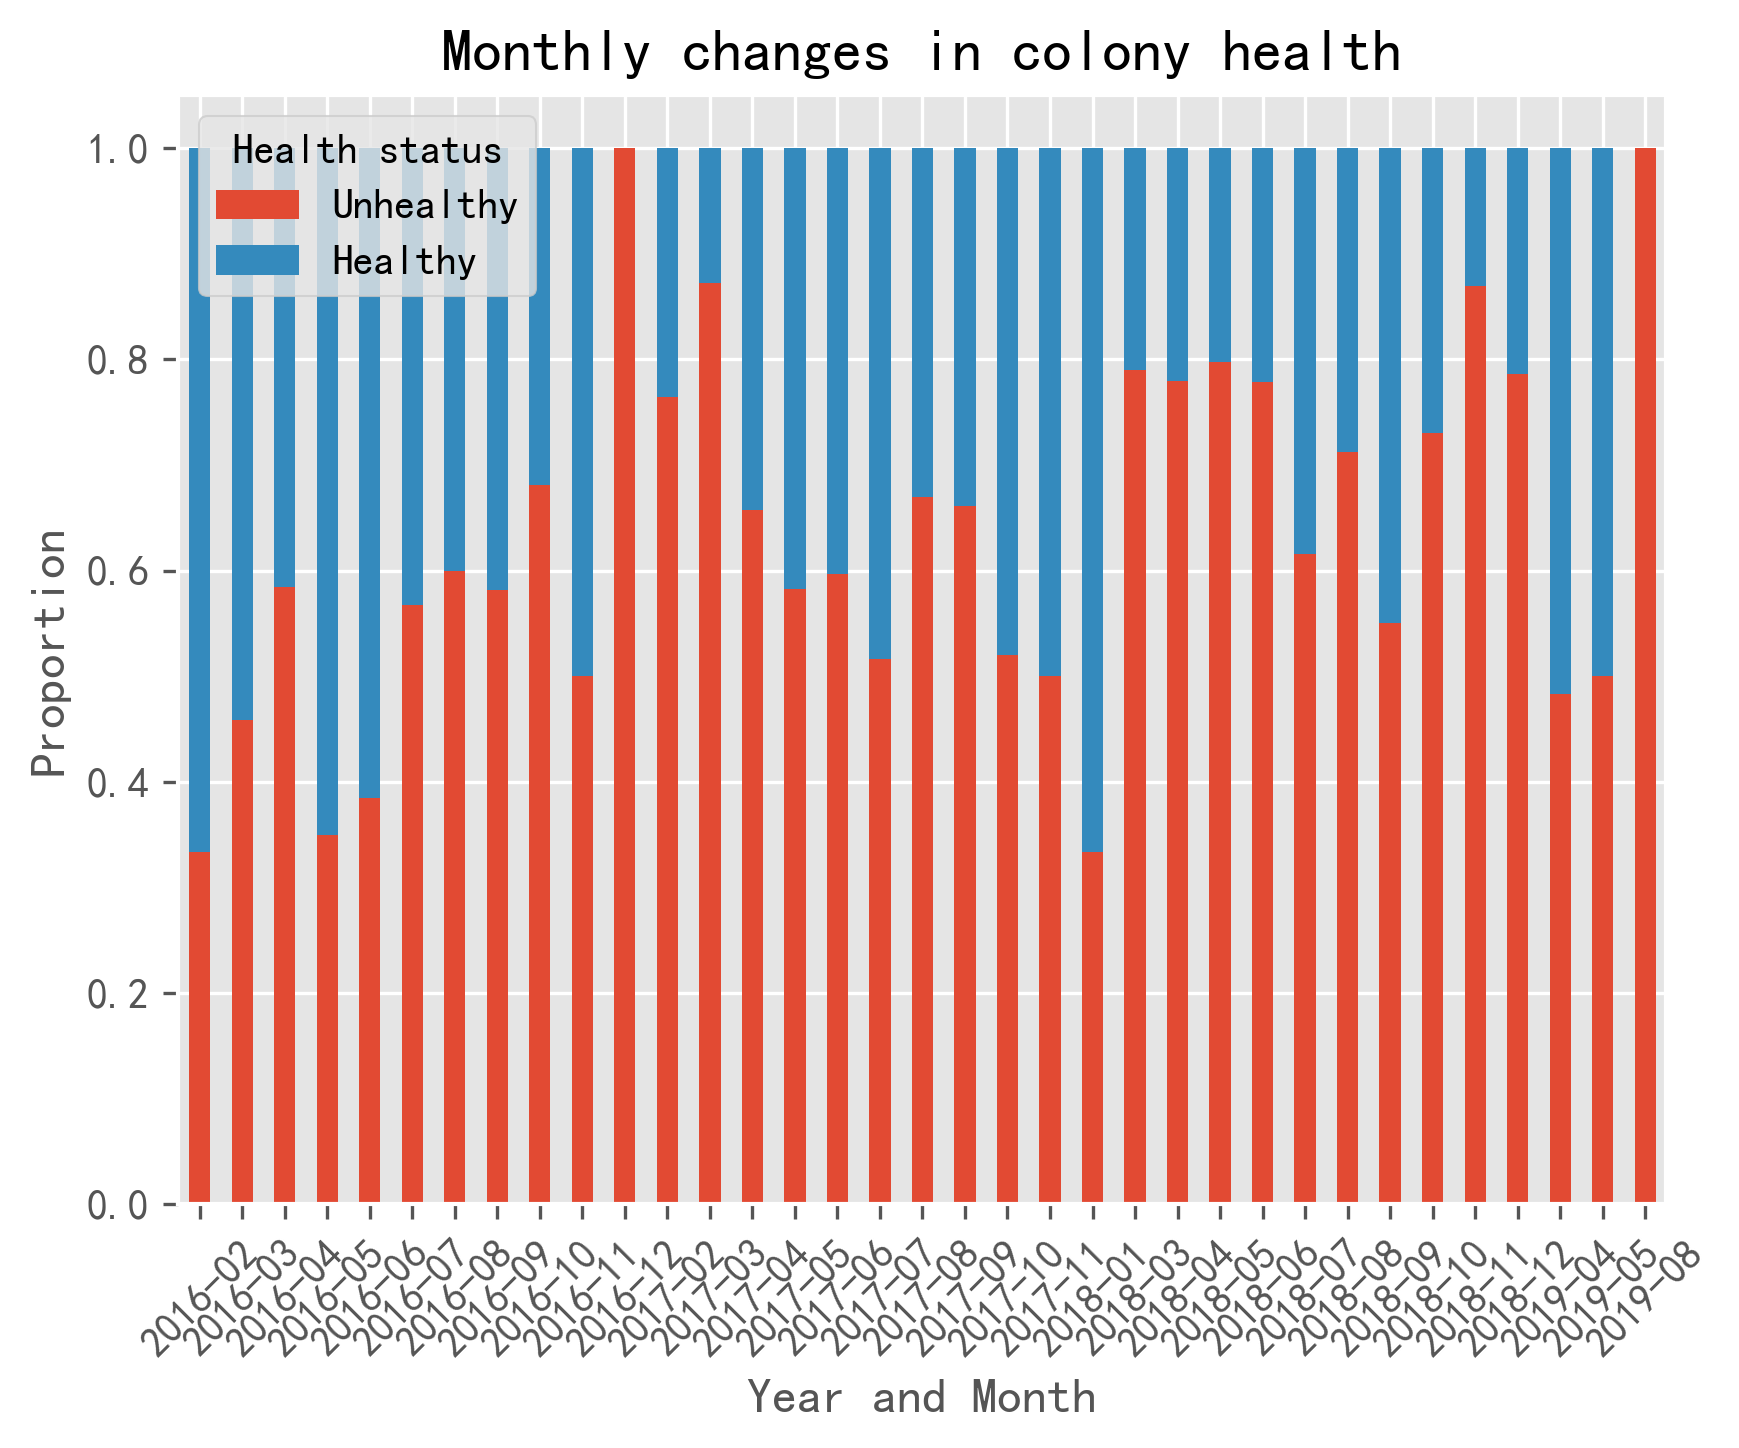

In [41]:
# Data preprocessing
HCC_Inspections_df['InsptDate'] = pd.to_datetime(HCC_Inspections_df['InsptDate'])
HCC_Inspections_df['YearMonth'] = HCC_Inspections_df['InsptDate'].dt.to_period('M')

# Colony health changes over time
plt.figure(figsize=(12,6))
health_by_month = HCC_Inspections_df.groupby('YearMonth')['Healthy'].value_counts(normalize=True).unstack()
health_by_month.plot(kind='bar', stacked=True)
plt.title('Monthly changes in colony health')
plt.ylabel('Proportion')
plt.xlabel('Year and Month')
plt.legend(title='Health status', labels=['Unhealthy', 'Healthy'])
plt.xticks(rotation=45)
plt.show()

### The relationship between each indicator and health status

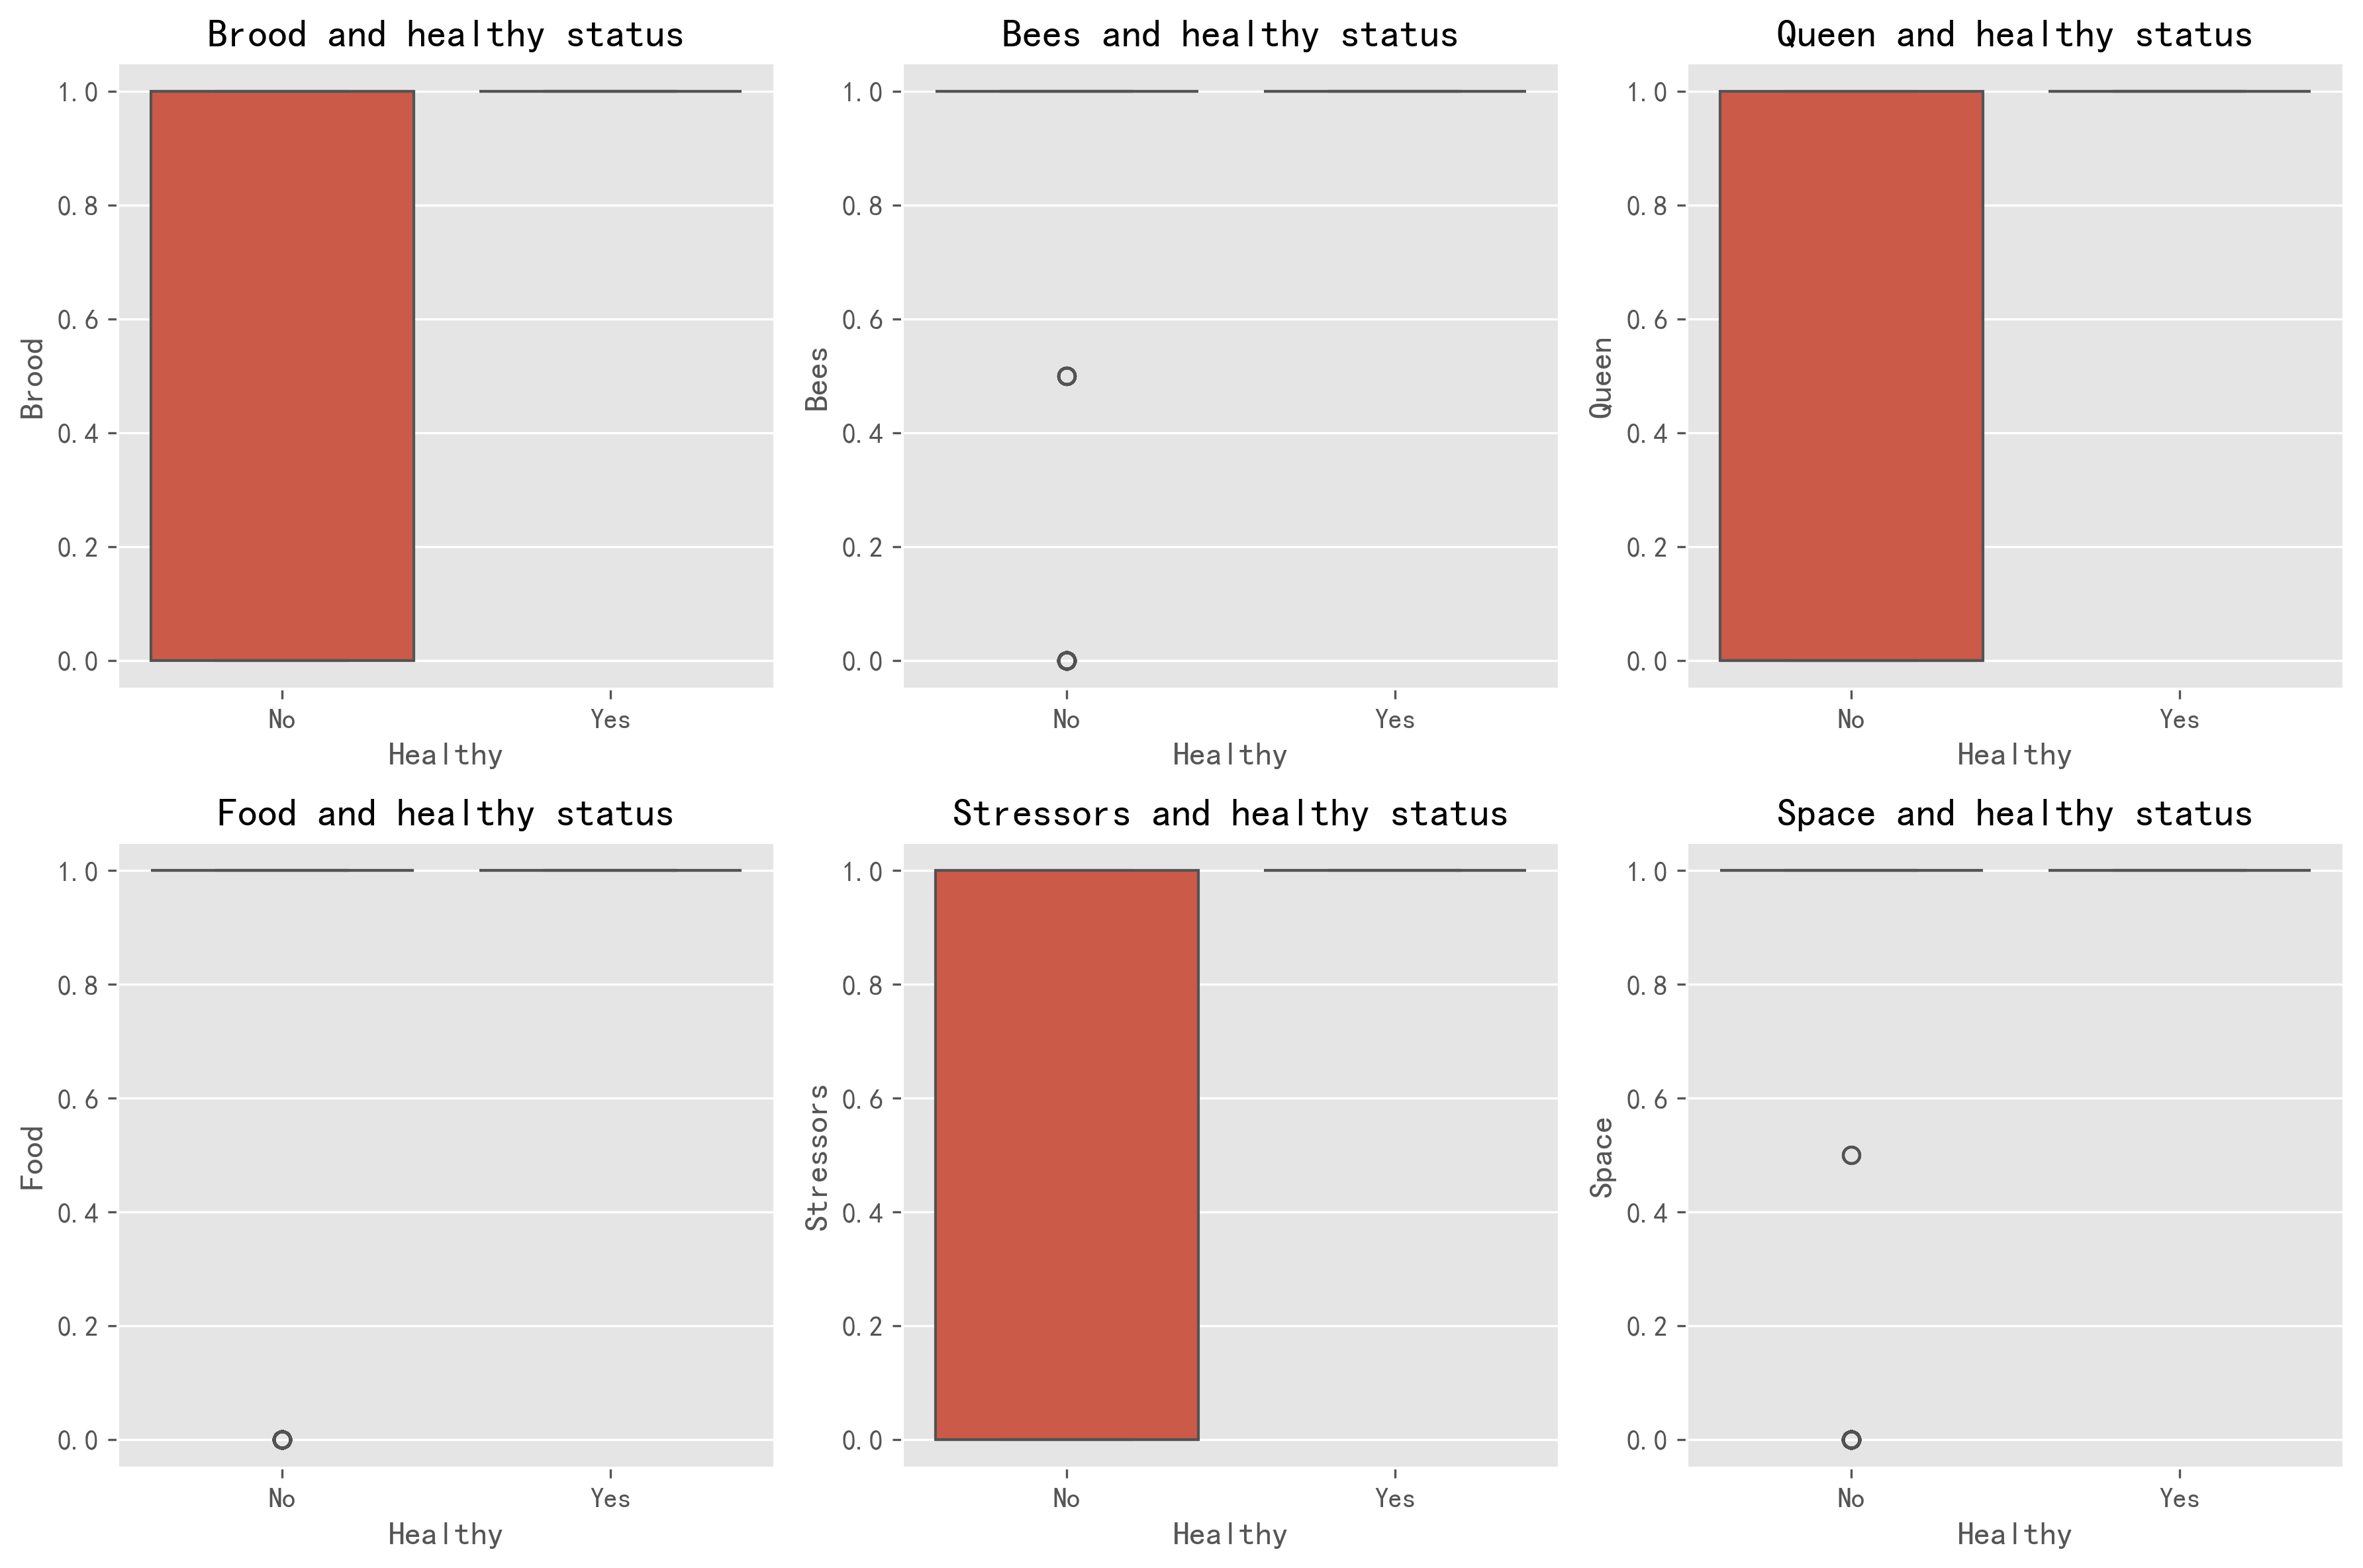

In [42]:
indicators = ['Brood','Bees','Queen','Food','Stressors','Space']
plt.figure(figsize=(12,8))
for i, col in enumerate(indicators, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x='Healthy', y=col, data=HCC_Inspections_df)
    plt.title(f'{col} and healthy status')
plt.tight_layout()
plt.show()

### Correlation heat map of each indicator

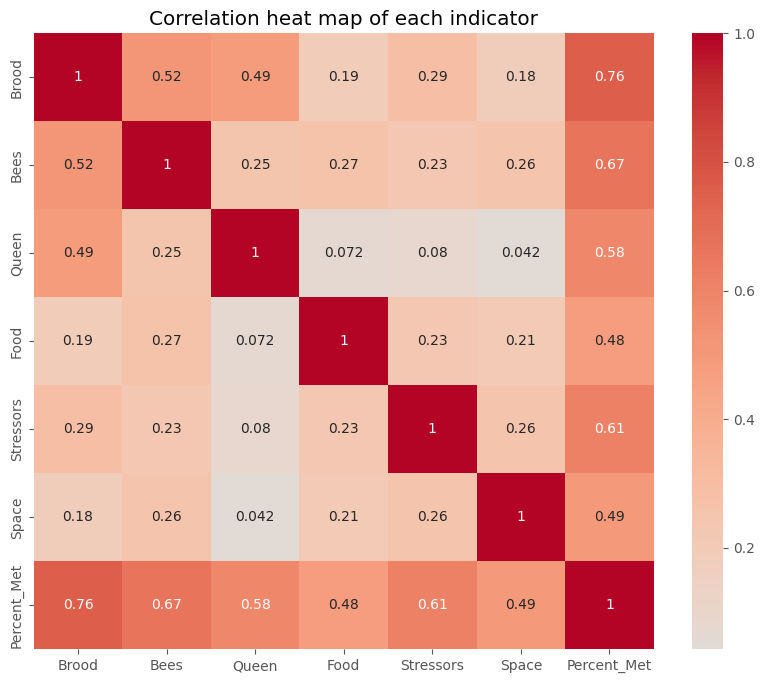

In [16]:

corr_matrix = HCC_Inspections_df[['Brood','Bees','Queen','Food','Stressors','Space','Percent_Met']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation heat map of each indicator')
plt.show()

<Figure size 3600x1800 with 0 Axes>

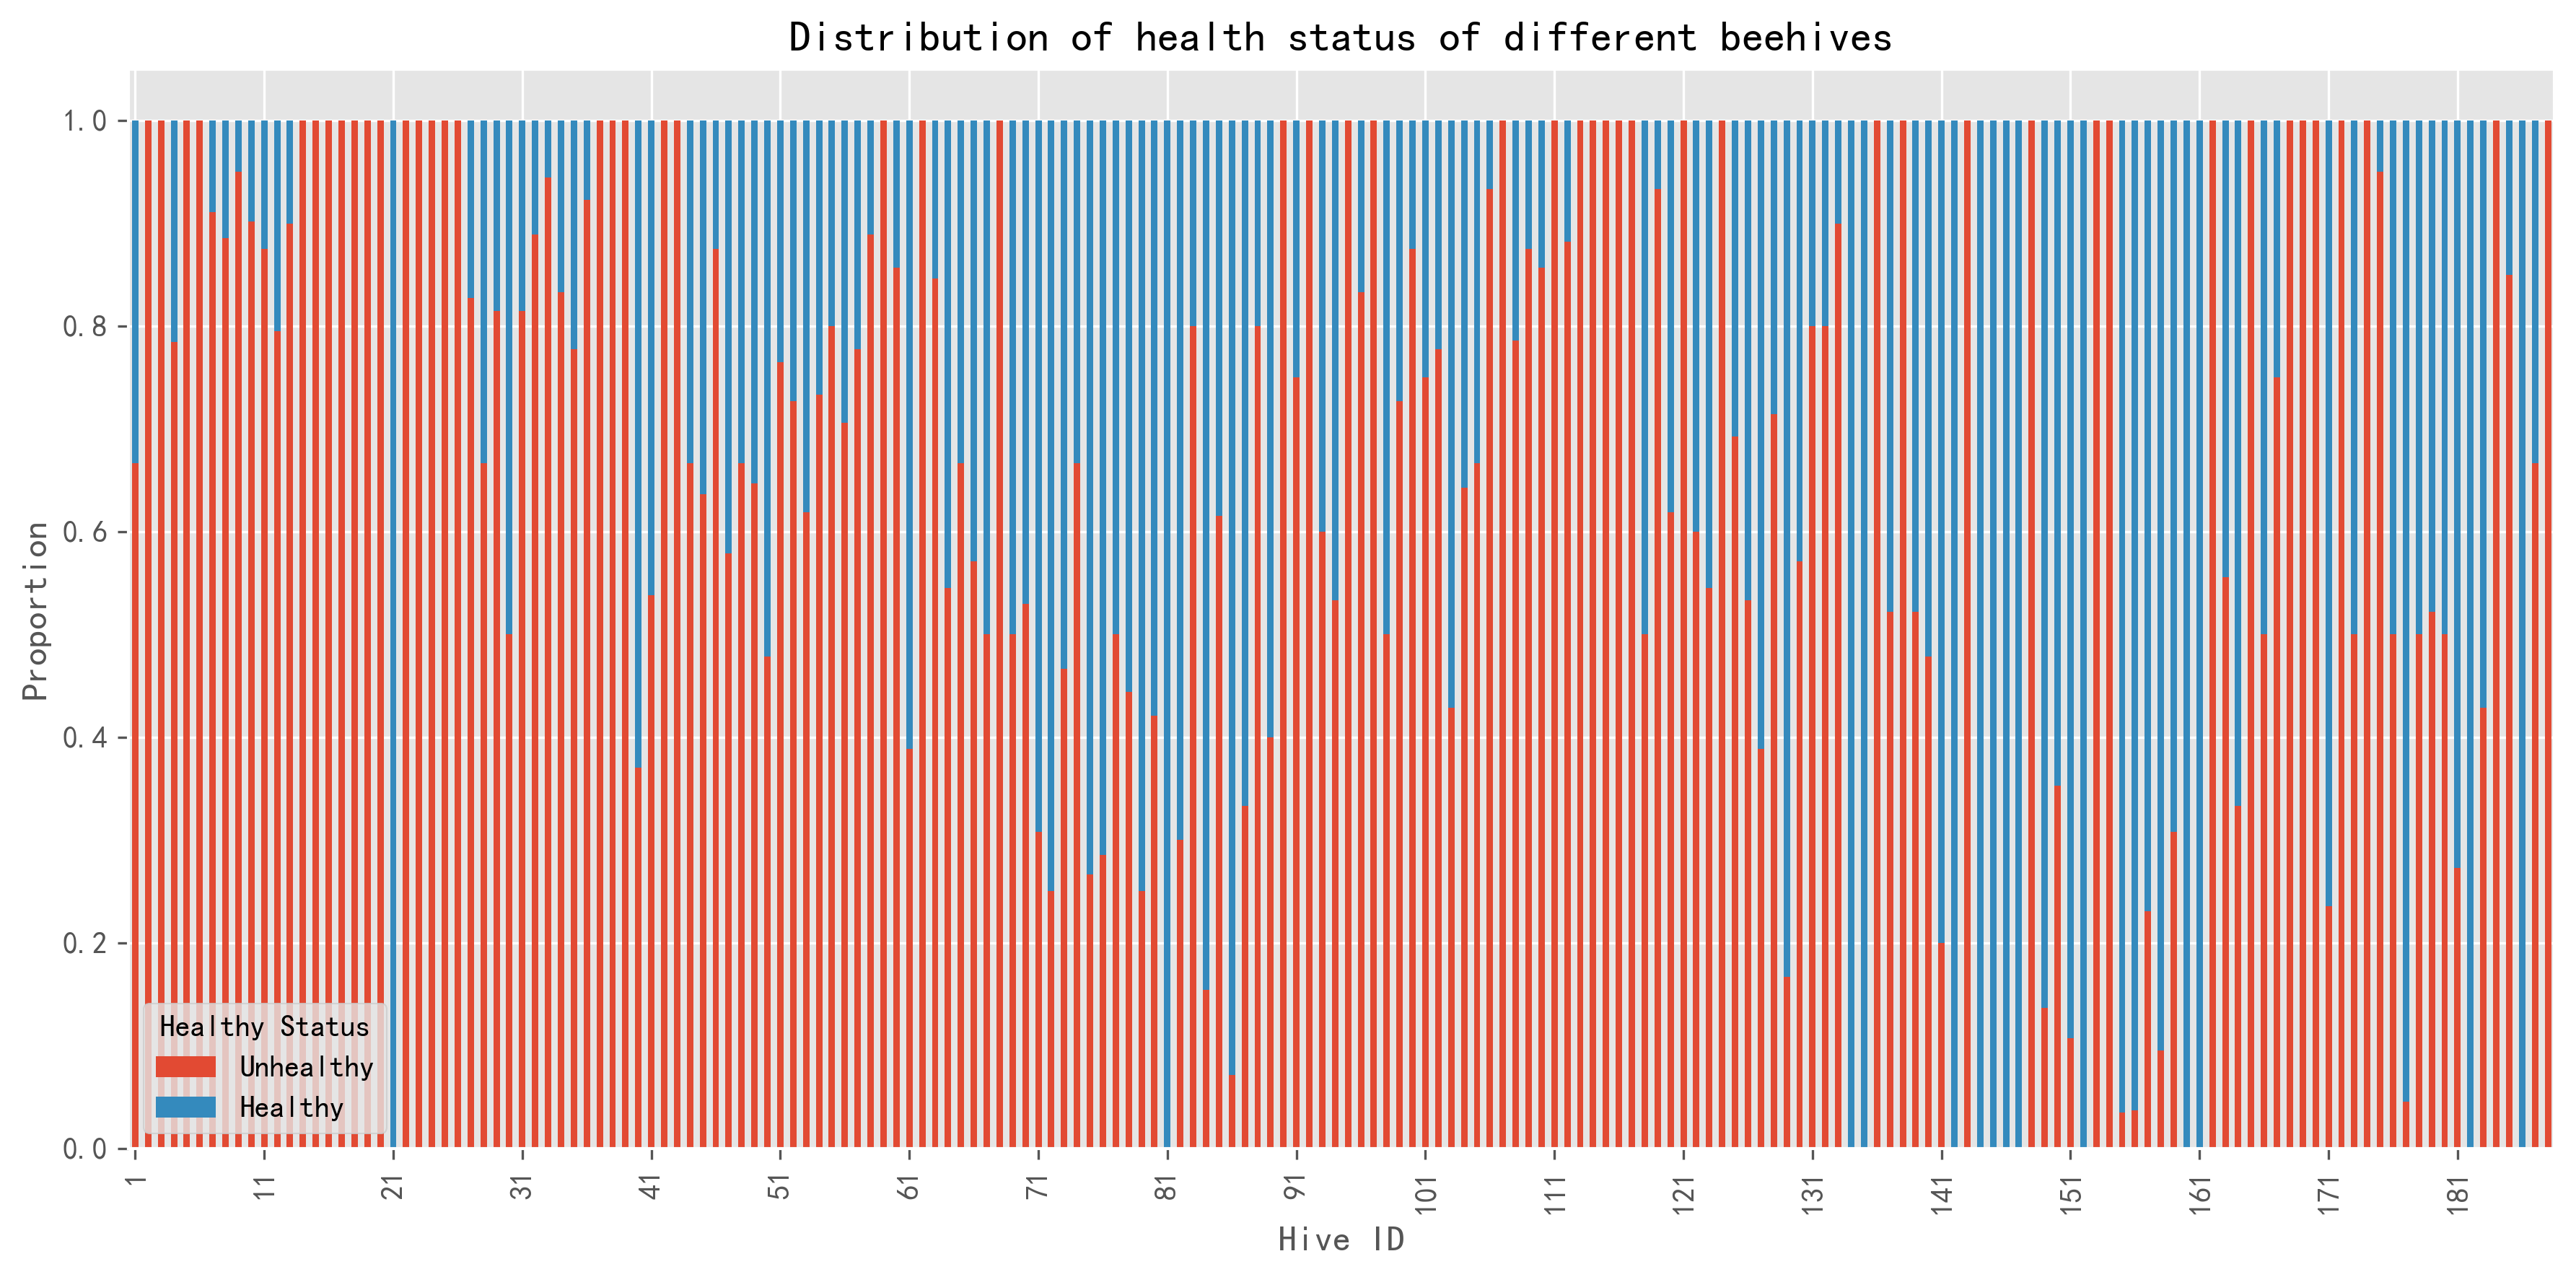

In [43]:
plt.figure(figsize=(12,6))

# Group by HiveID and normalize the counts of health status
health_by_hive = HCC_Inspections_df.groupby('HiveID')['Healthy'].value_counts(normalize=True).unstack()

# Plot the stacked bar chart
ax = health_by_hive.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution of health status of different beehives')
plt.ylabel('Proportion')
plt.xlabel('Hive ID')
plt.legend(title='Healthy Status', labels=['Unhealthy', 'Healthy'])

# Set x-axis ticks to show one every 10 hives
xticks = ax.get_xticks()
xtick_labels = health_by_hive.index
ax.set_xticks([i for i in xticks if i % 10 == 0])
ax.set_xticklabels([str(xtick_labels[i]) for i in range(len(xtick_labels)) if i % 10 == 0], rotation=90)

plt.tight_layout()
plt.show()


### Percentage of attainment distribution

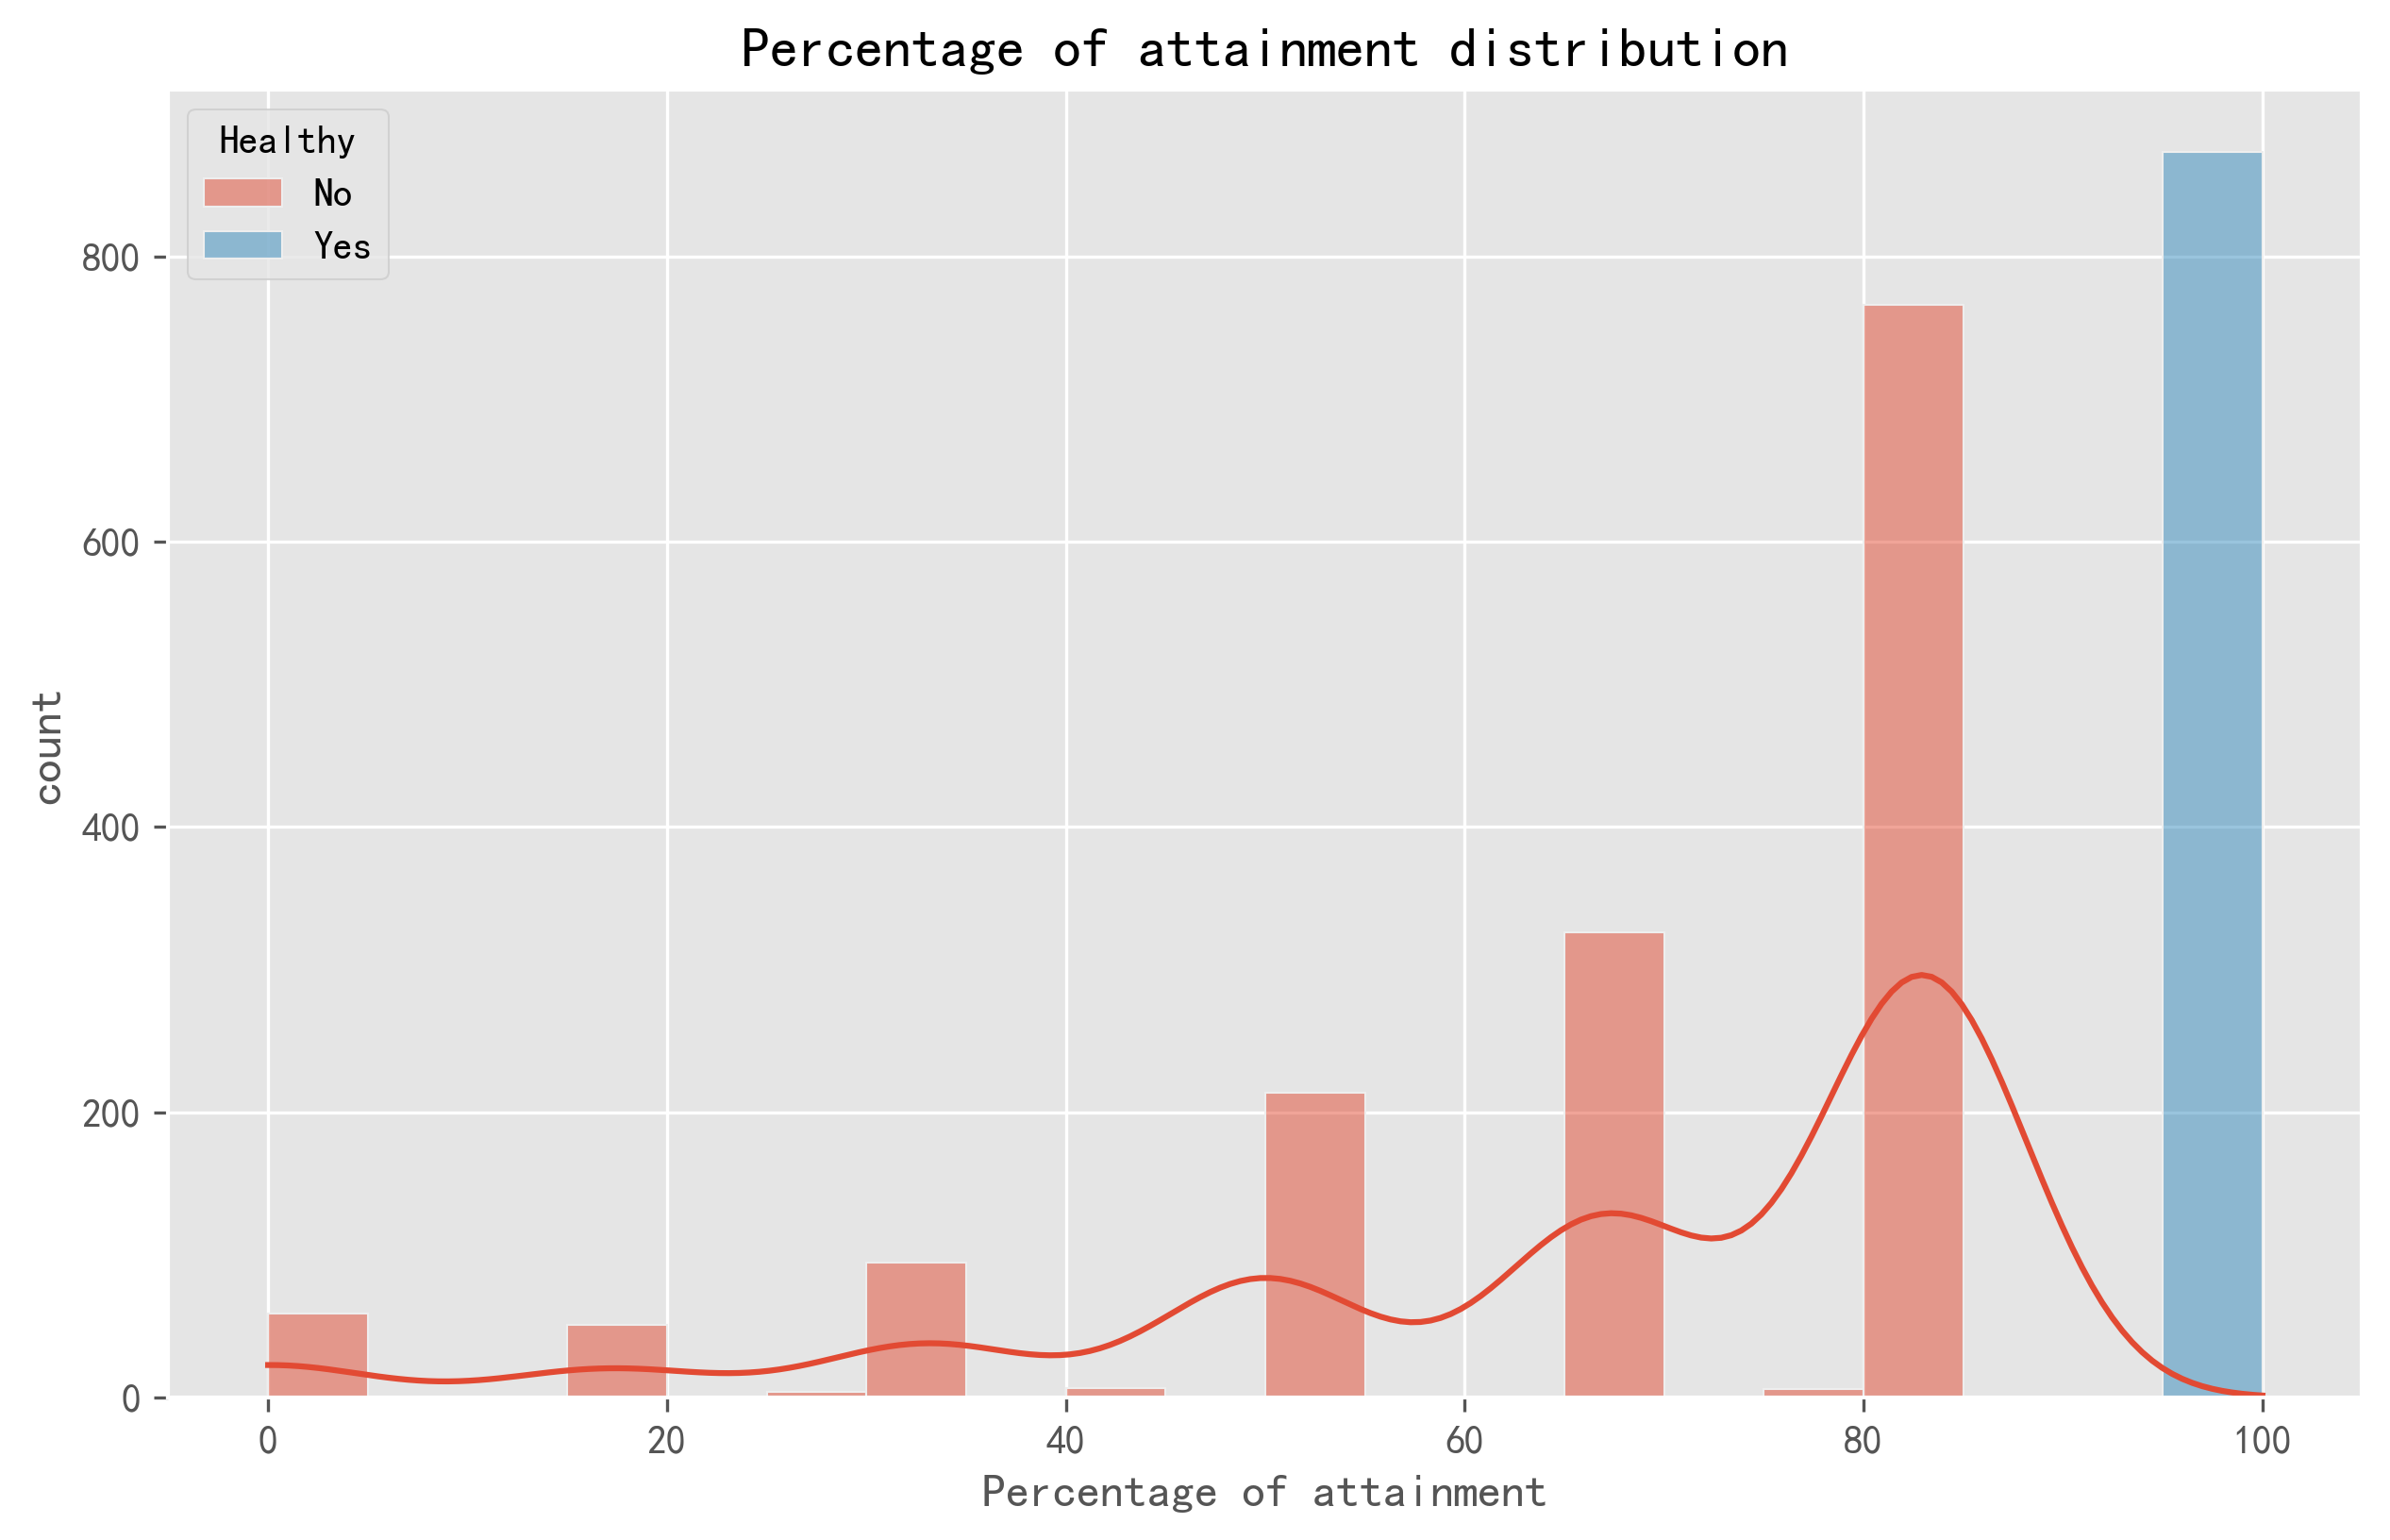

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(data=HCC_Inspections_df, x='Percent_Met', hue='Healthy', bins=20, kde=True)
plt.title('Percentage of attainment distribution')
plt.xlabel('Percentage of attainment')
plt.ylabel('count')
plt.show()

# Hive_Information

###  Hives per Apiary

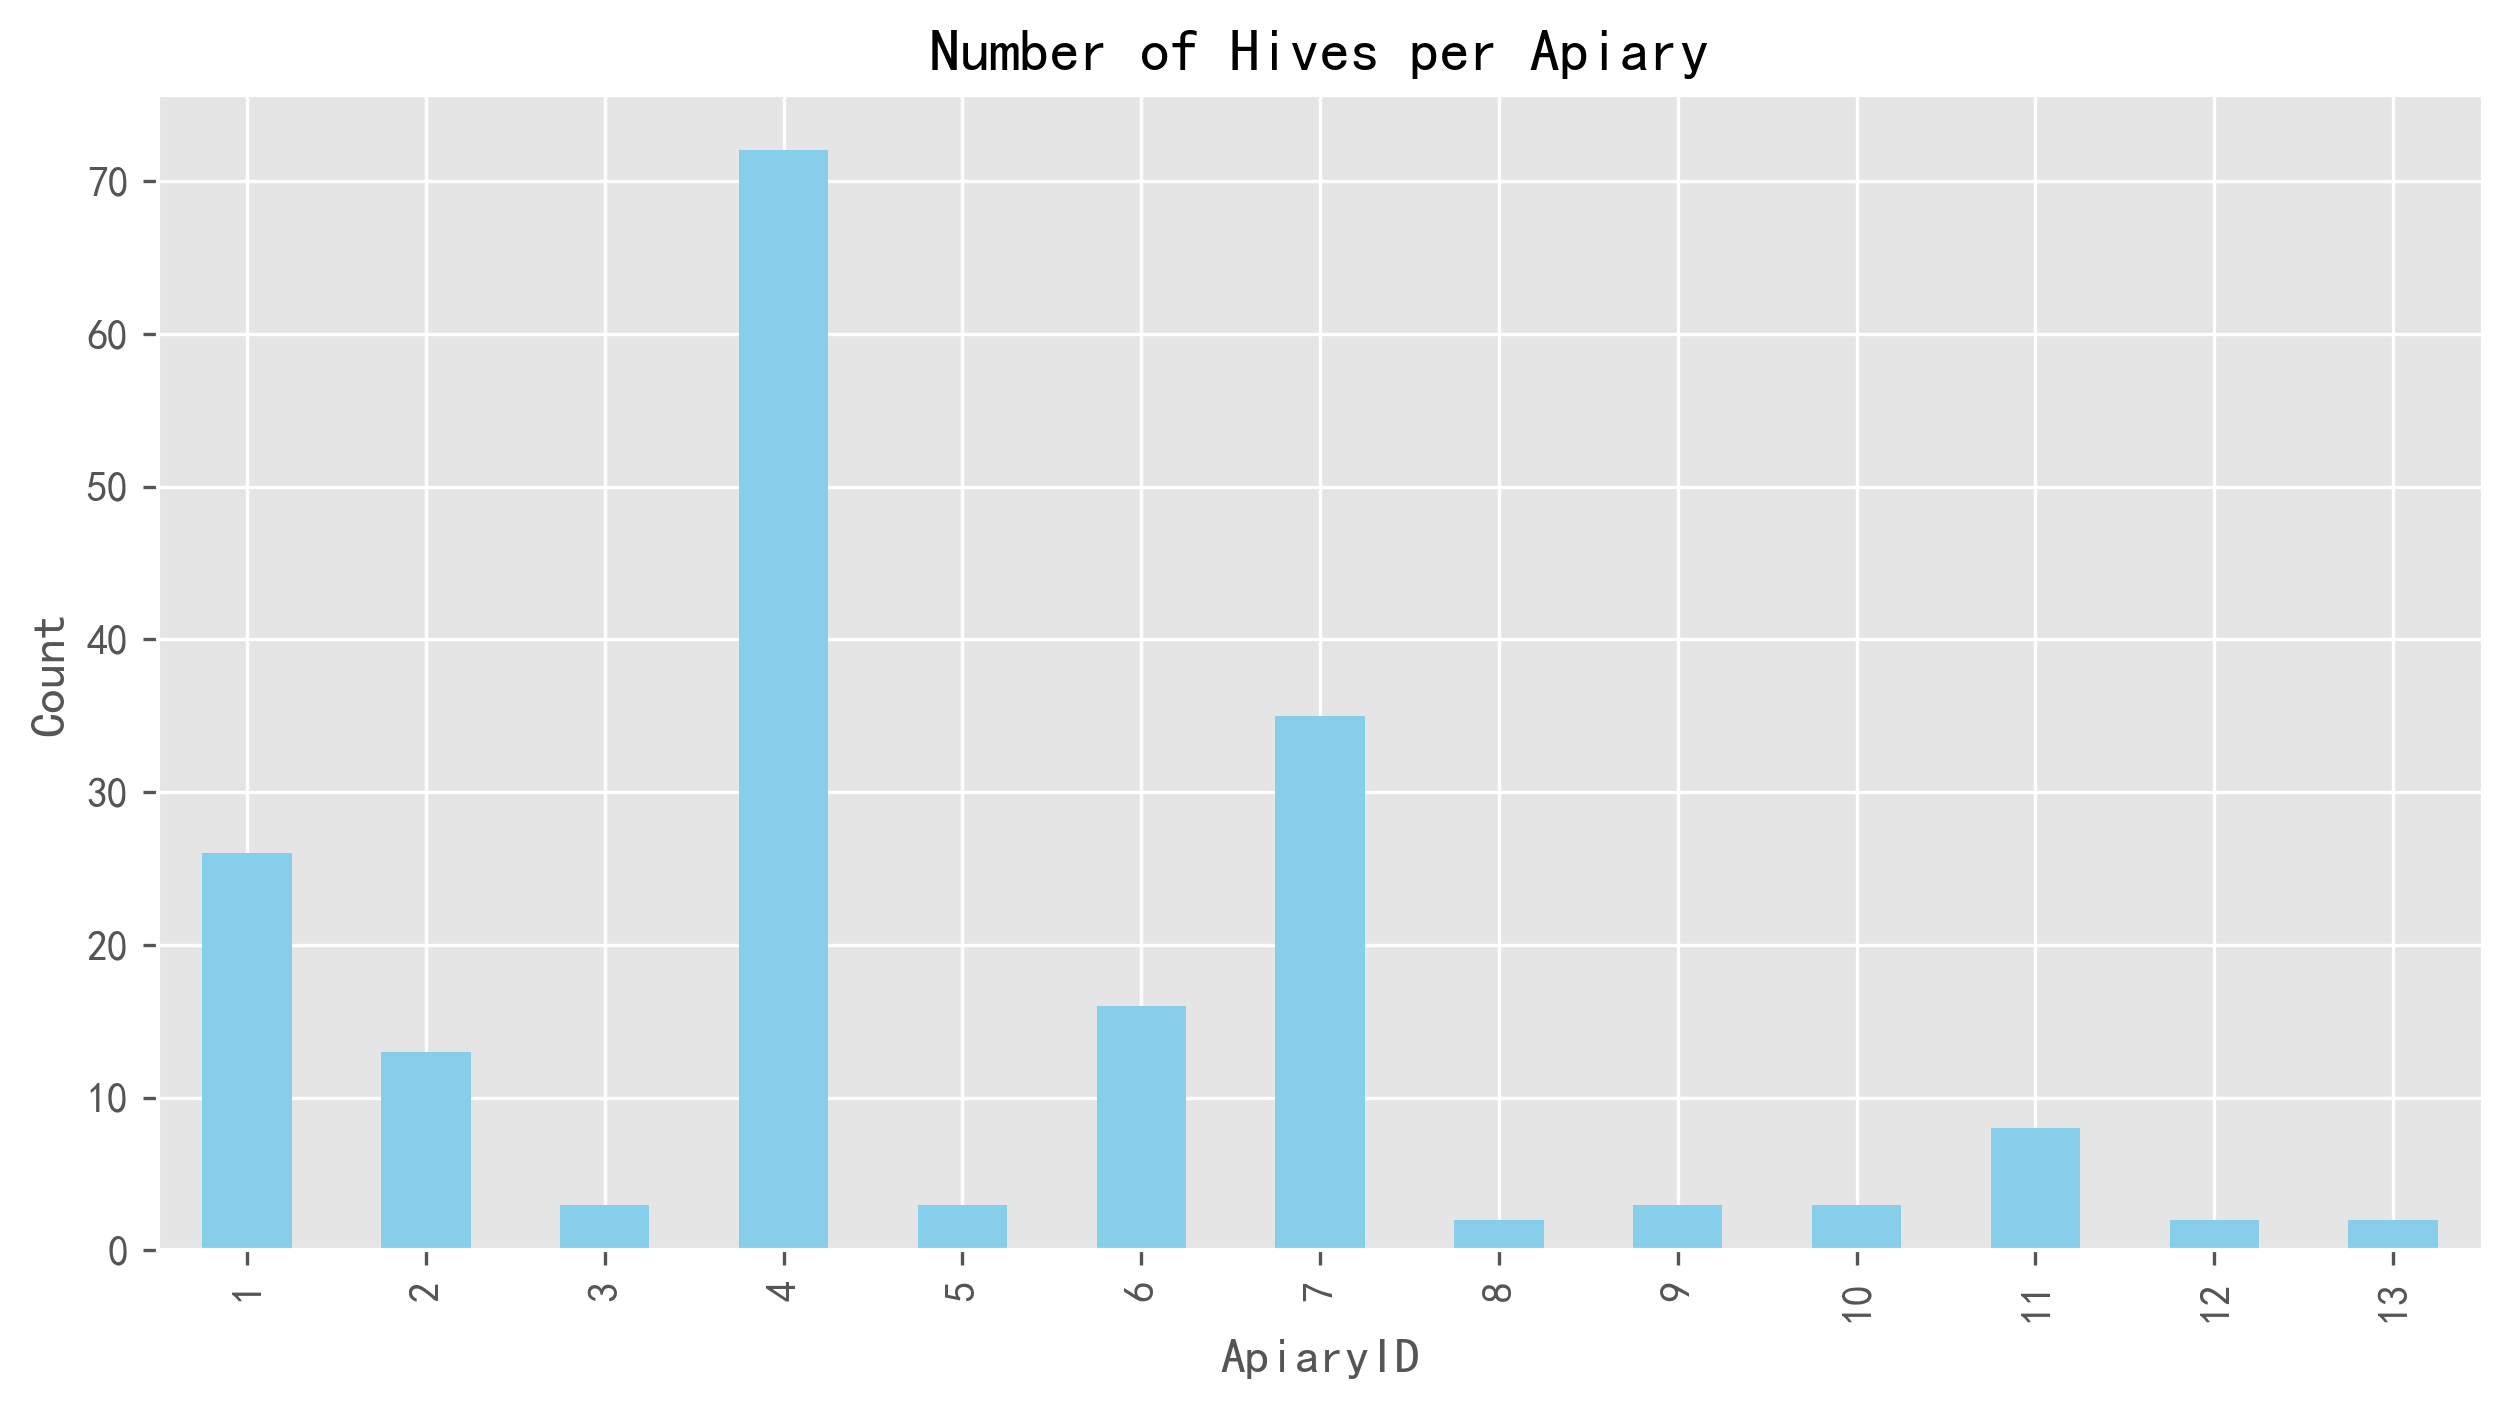

In [45]:
apiary_counts = Hive_Information_df["ApiaryID"].value_counts().sort_index()
plt.figure(figsize=(10, 5))
apiary_counts.plot(kind="bar", color="skyblue")
plt.title("Number of Hives per Apiary")
plt.xlabel("ApiaryID")
plt.ylabel("Count")
plt.show()

### Tag Frequency

WordCloud not installed. Using bar chart instead.


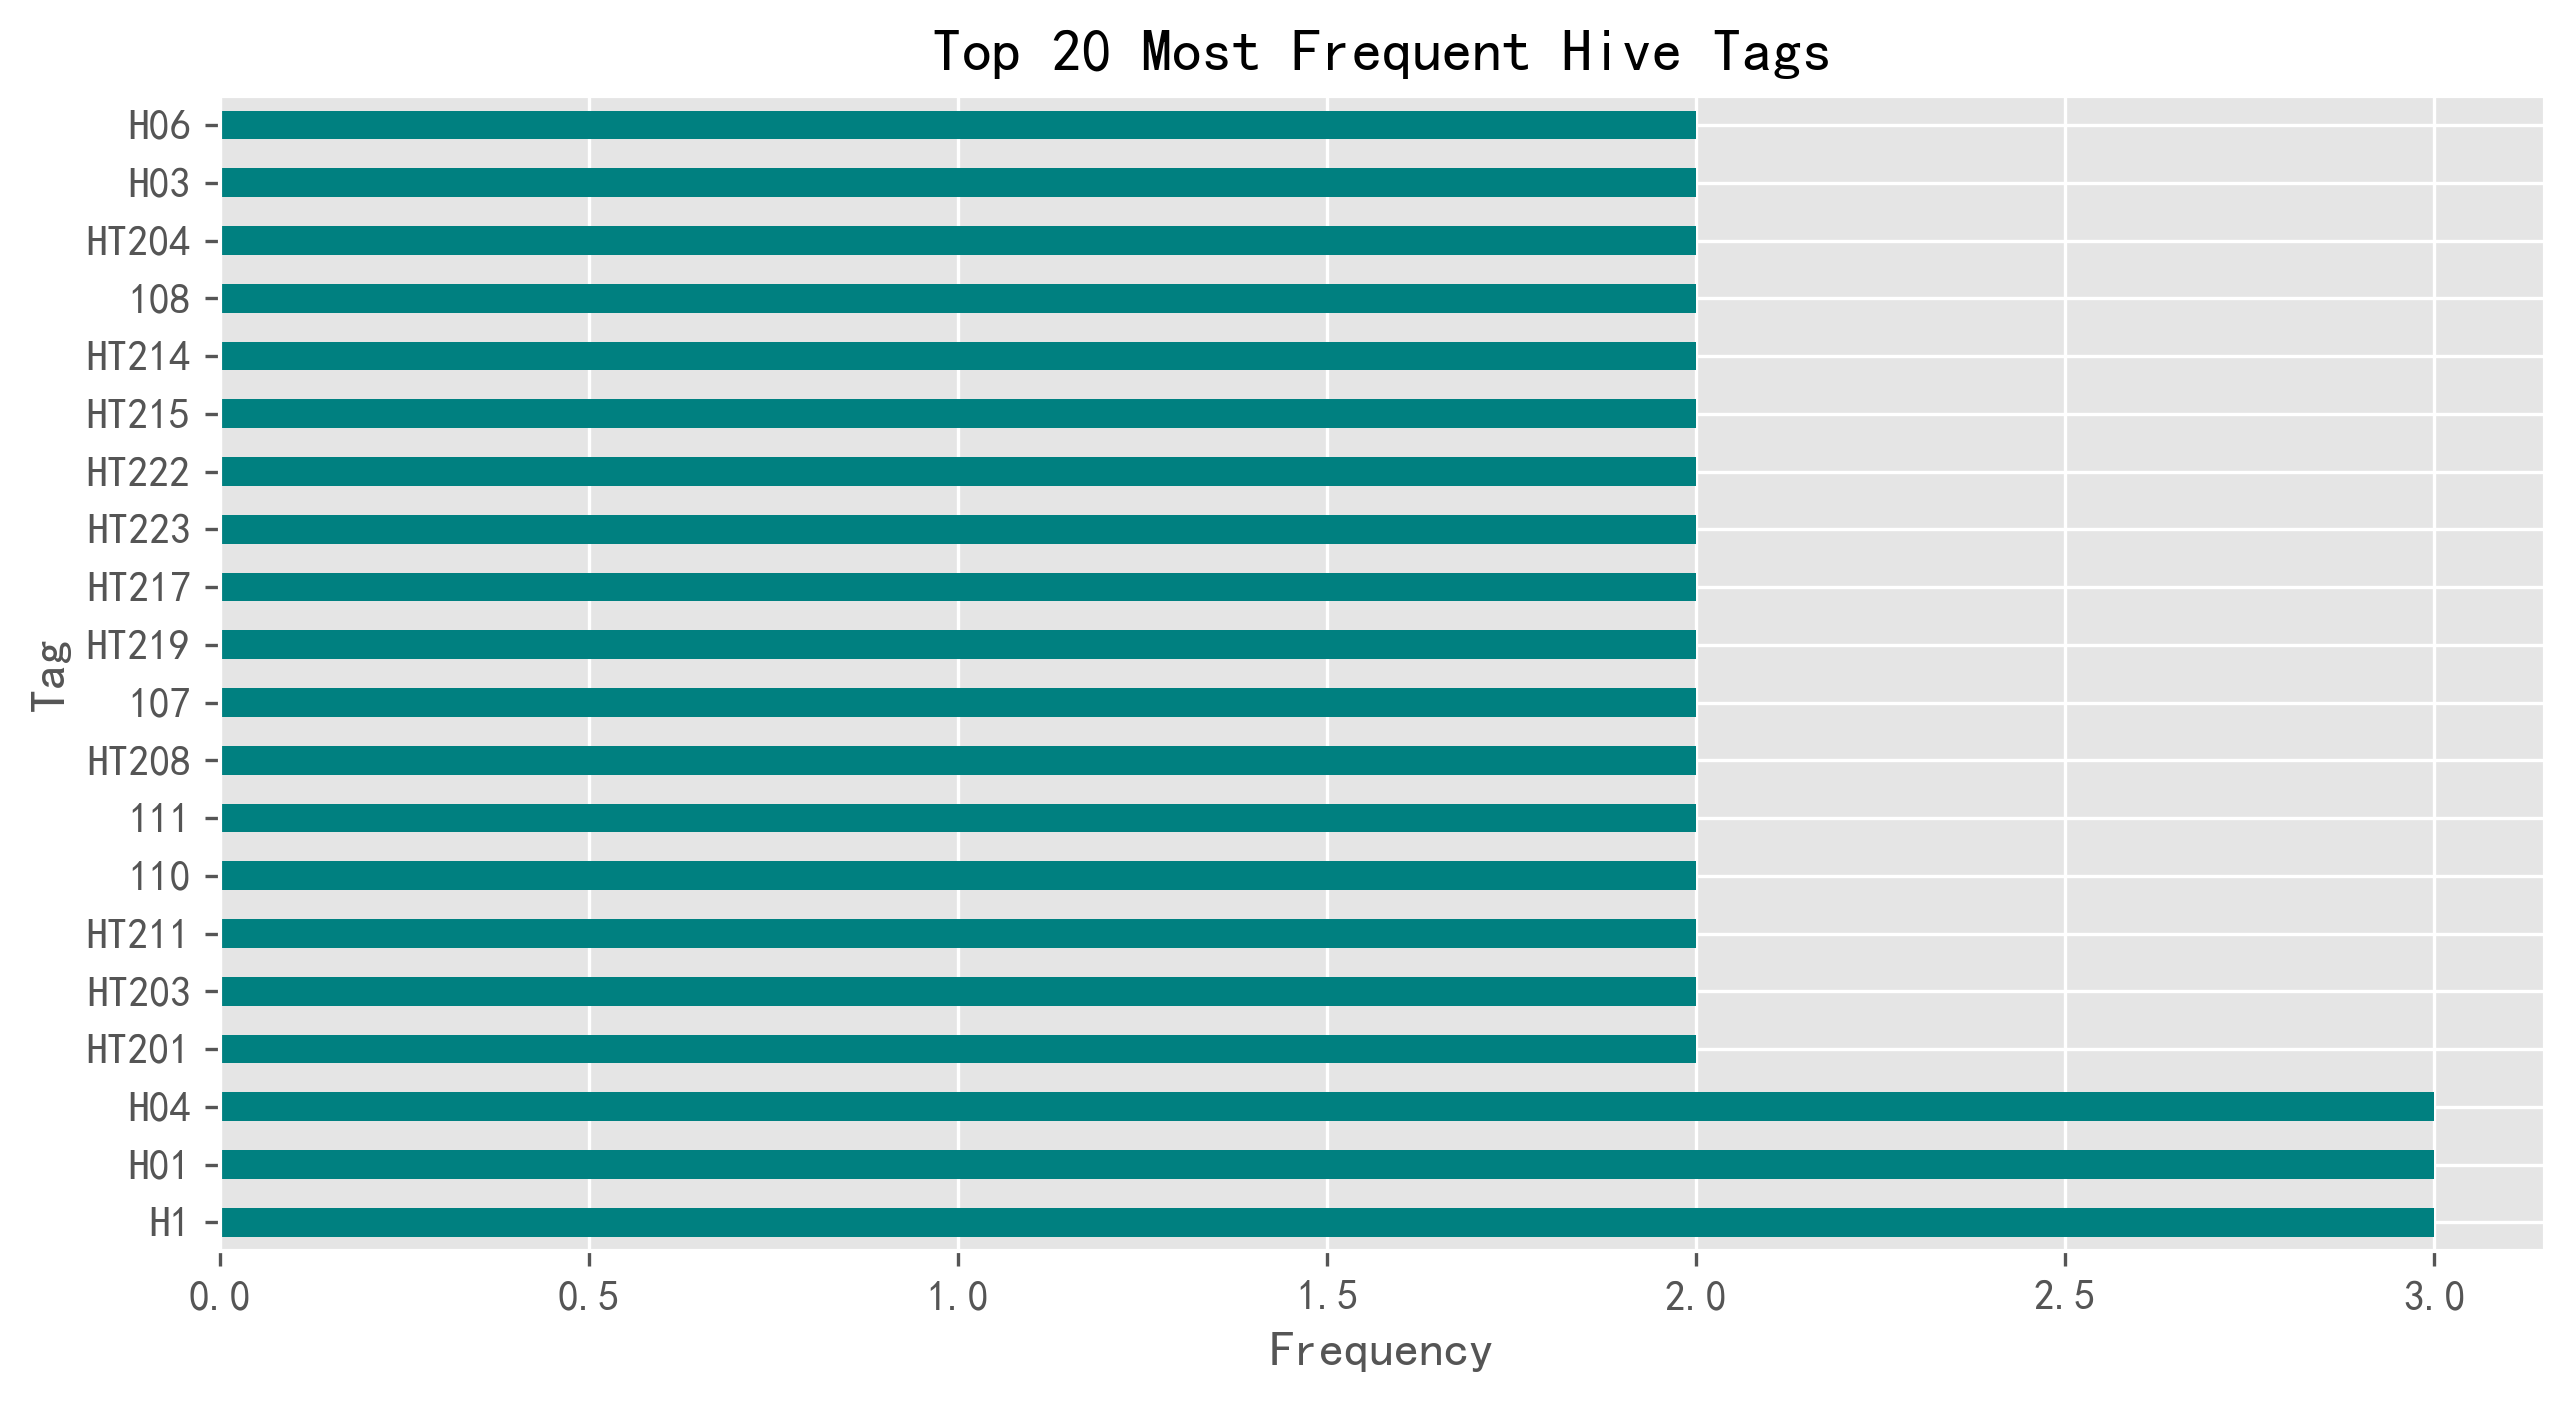

In [46]:
try:
    from wordcloud import WordCloud
    tags = " ".join(df["Hive_Tag"].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(tags)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Hive Tag Word Cloud")
    plt.show()
except ImportError:
    print("WordCloud not installed. Using bar chart instead.")
    top_tags = Hive_Information_df["Hive_Tag"].value_counts().head(20)
    plt.figure(figsize=(10, 5))
    top_tags.plot(kind="barh", color="teal")
    plt.title("Top 20 Most Frequent Hive Tags")
    plt.xlabel("Frequency")
    plt.ylabel("Tag")
    plt.show()

### Prefix Analysis

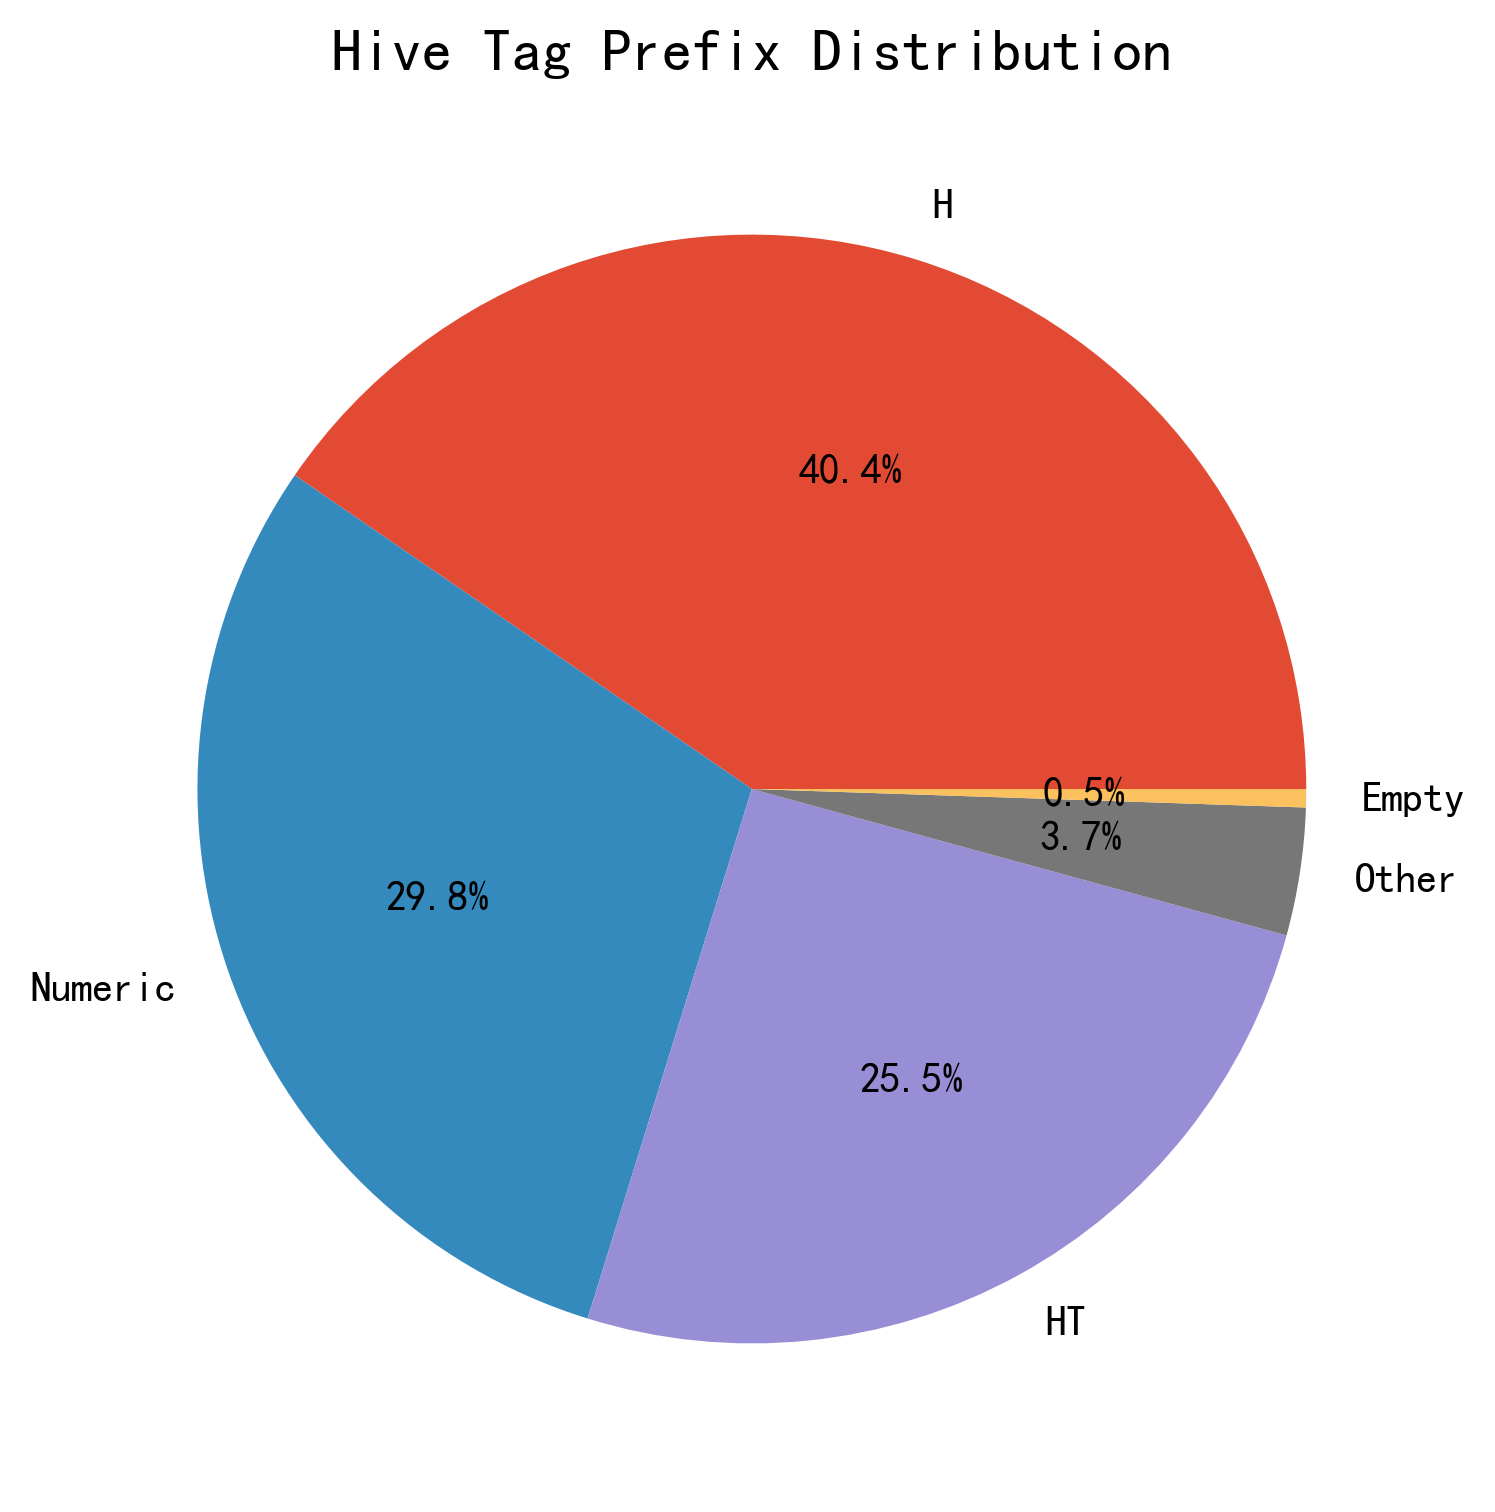

In [47]:
def extract_prefix(tag):
    if pd.isna(tag):
        return "Empty"
    if isinstance(tag, str):
        if tag.startswith("HT"):
            return "HT"
        if tag.startswith("H"):
            return "H"
        if tag.isdigit():
            return "Numeric"
    return "Other"

Hive_Information_df["Prefix"] = Hive_Information_df["Hive_Tag"].apply(extract_prefix)
prefix_counts = Hive_Information_df["Prefix"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(prefix_counts, labels=prefix_counts.index, autopct="%1.1f%%")
plt.title("Hive Tag Prefix Distribution")
plt.show()

# Hourly_Weather

### Trend of temperature over time

In [22]:
Hourly_Weather_df.head()

,WeatherID,ObsID,StationID,Temperature,Humidity,Dew_Point,Wind_Direction,Wind_Speed,Wind_Gust,Pressure,Precip,Condition,Sunrise,Sunset,Daylight_Hours,InpsectionID
0,1,1,1,54?,45?,33?,VAR,7?,0?,29.54?,0.0?,Fair,7:07:00,19:35:00,12:28:00,1
1,2,2,1,52?,47?,32?,NNW,3?,0?,29.56?,0.0?,Fair,7:07:00,19:35:00,12:28:00,2
2,3,3,1,51?,48?,32?,CALM,0?,0?,29.57?,0.0?,Fair,7:07:00,19:35:00,12:28:00,3
3,4,4,1,48?,56?,33?,CALM,0?,0?,29.57?,0.0?,Fair,7:07:00,19:35:00,12:28:00,4
4,5,5,1,46?,63?,34?,CALM,0?,0?,29.58?,0.0?,Fair,7:07:00,19:35:00,12:28:00,5


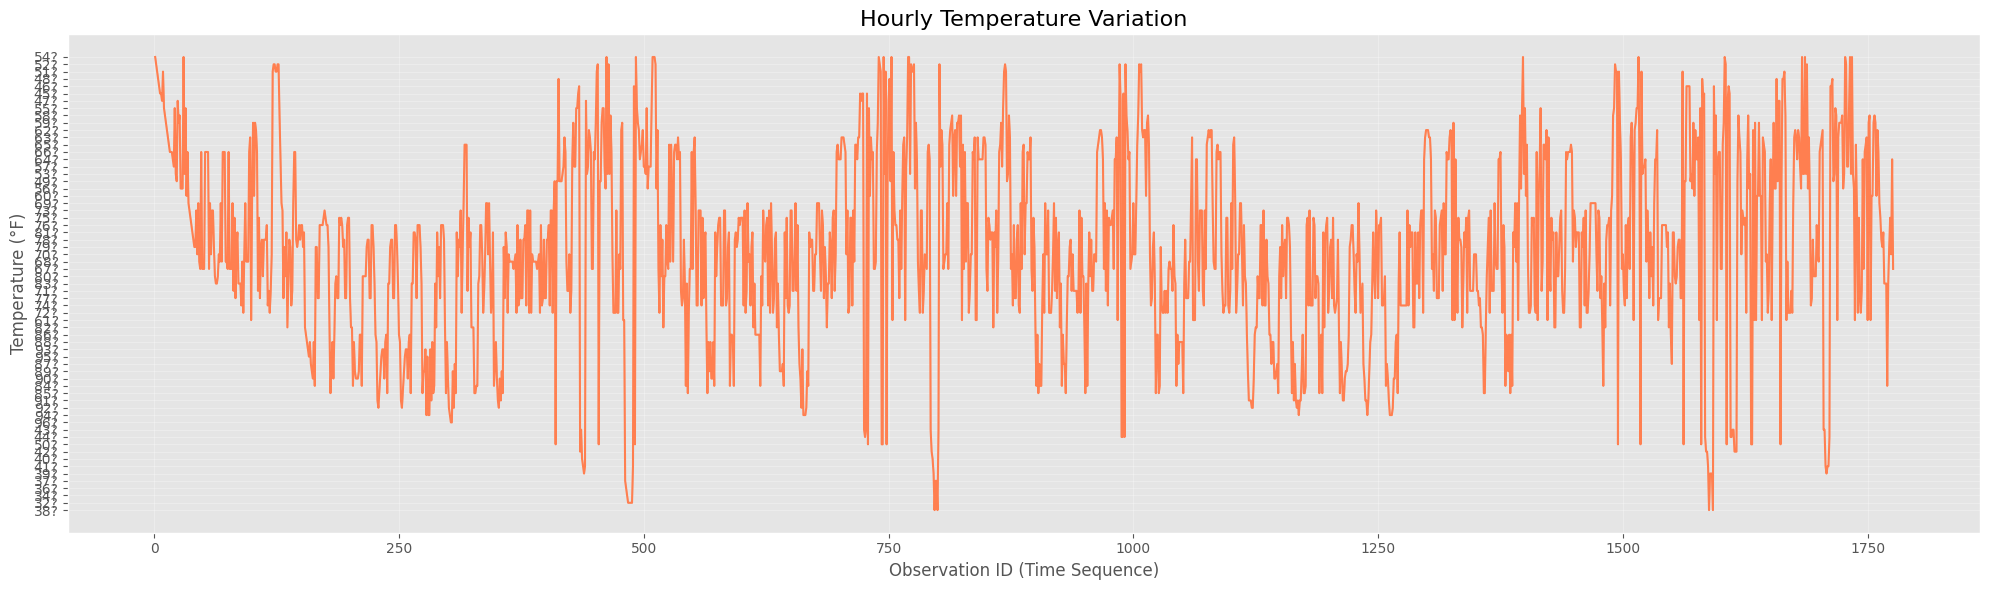

In [23]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='ObsID', y='Temperature', data=Hourly_Weather_df, color='coral')
plt.title('Hourly Temperature Variation', fontsize=16)
plt.xlabel('Observation ID (Time Sequence)', fontsize=12)
plt.ylabel('Temperature (°F)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

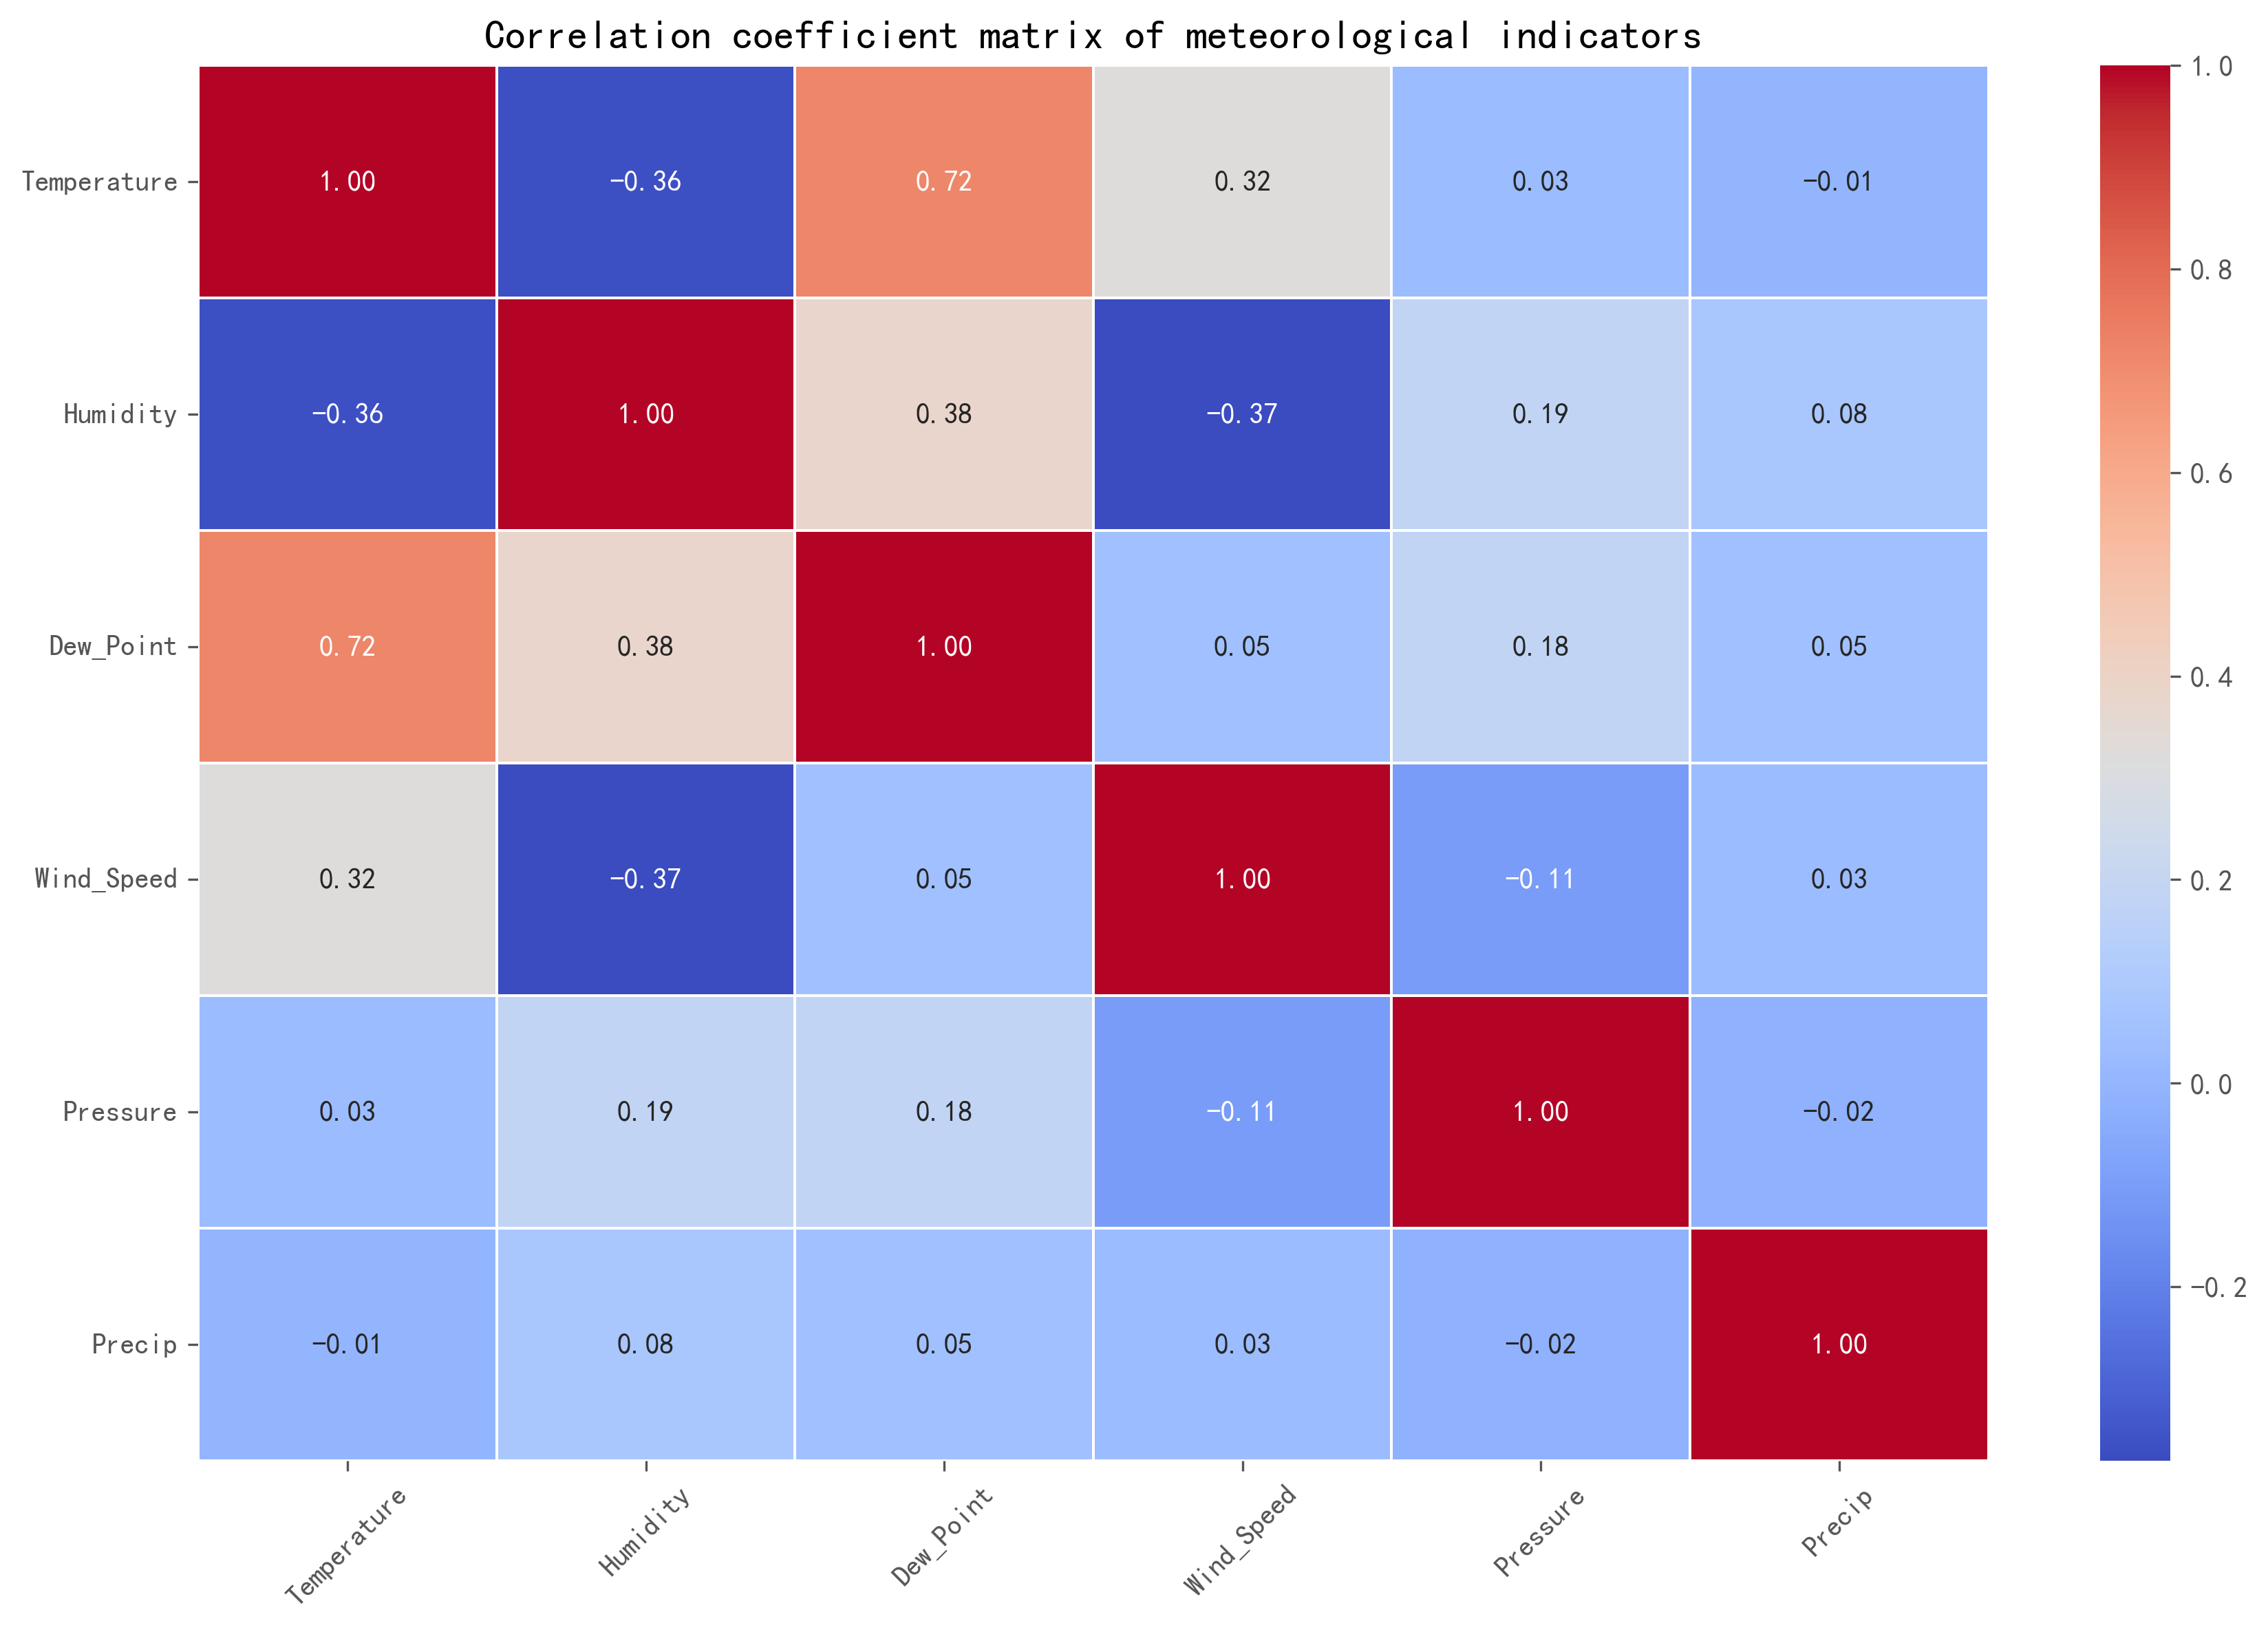

In [30]:
plt.figure(figsize=(12, 8))
corr_matrix = Hourly_Weather_df[[
    'Temperature', 
    'Humidity', 
    'Dew_Point',
    'Wind_Speed',
    'Pressure',
    'Precip'
]].corr()

sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation coefficient matrix of meteorological indicators')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

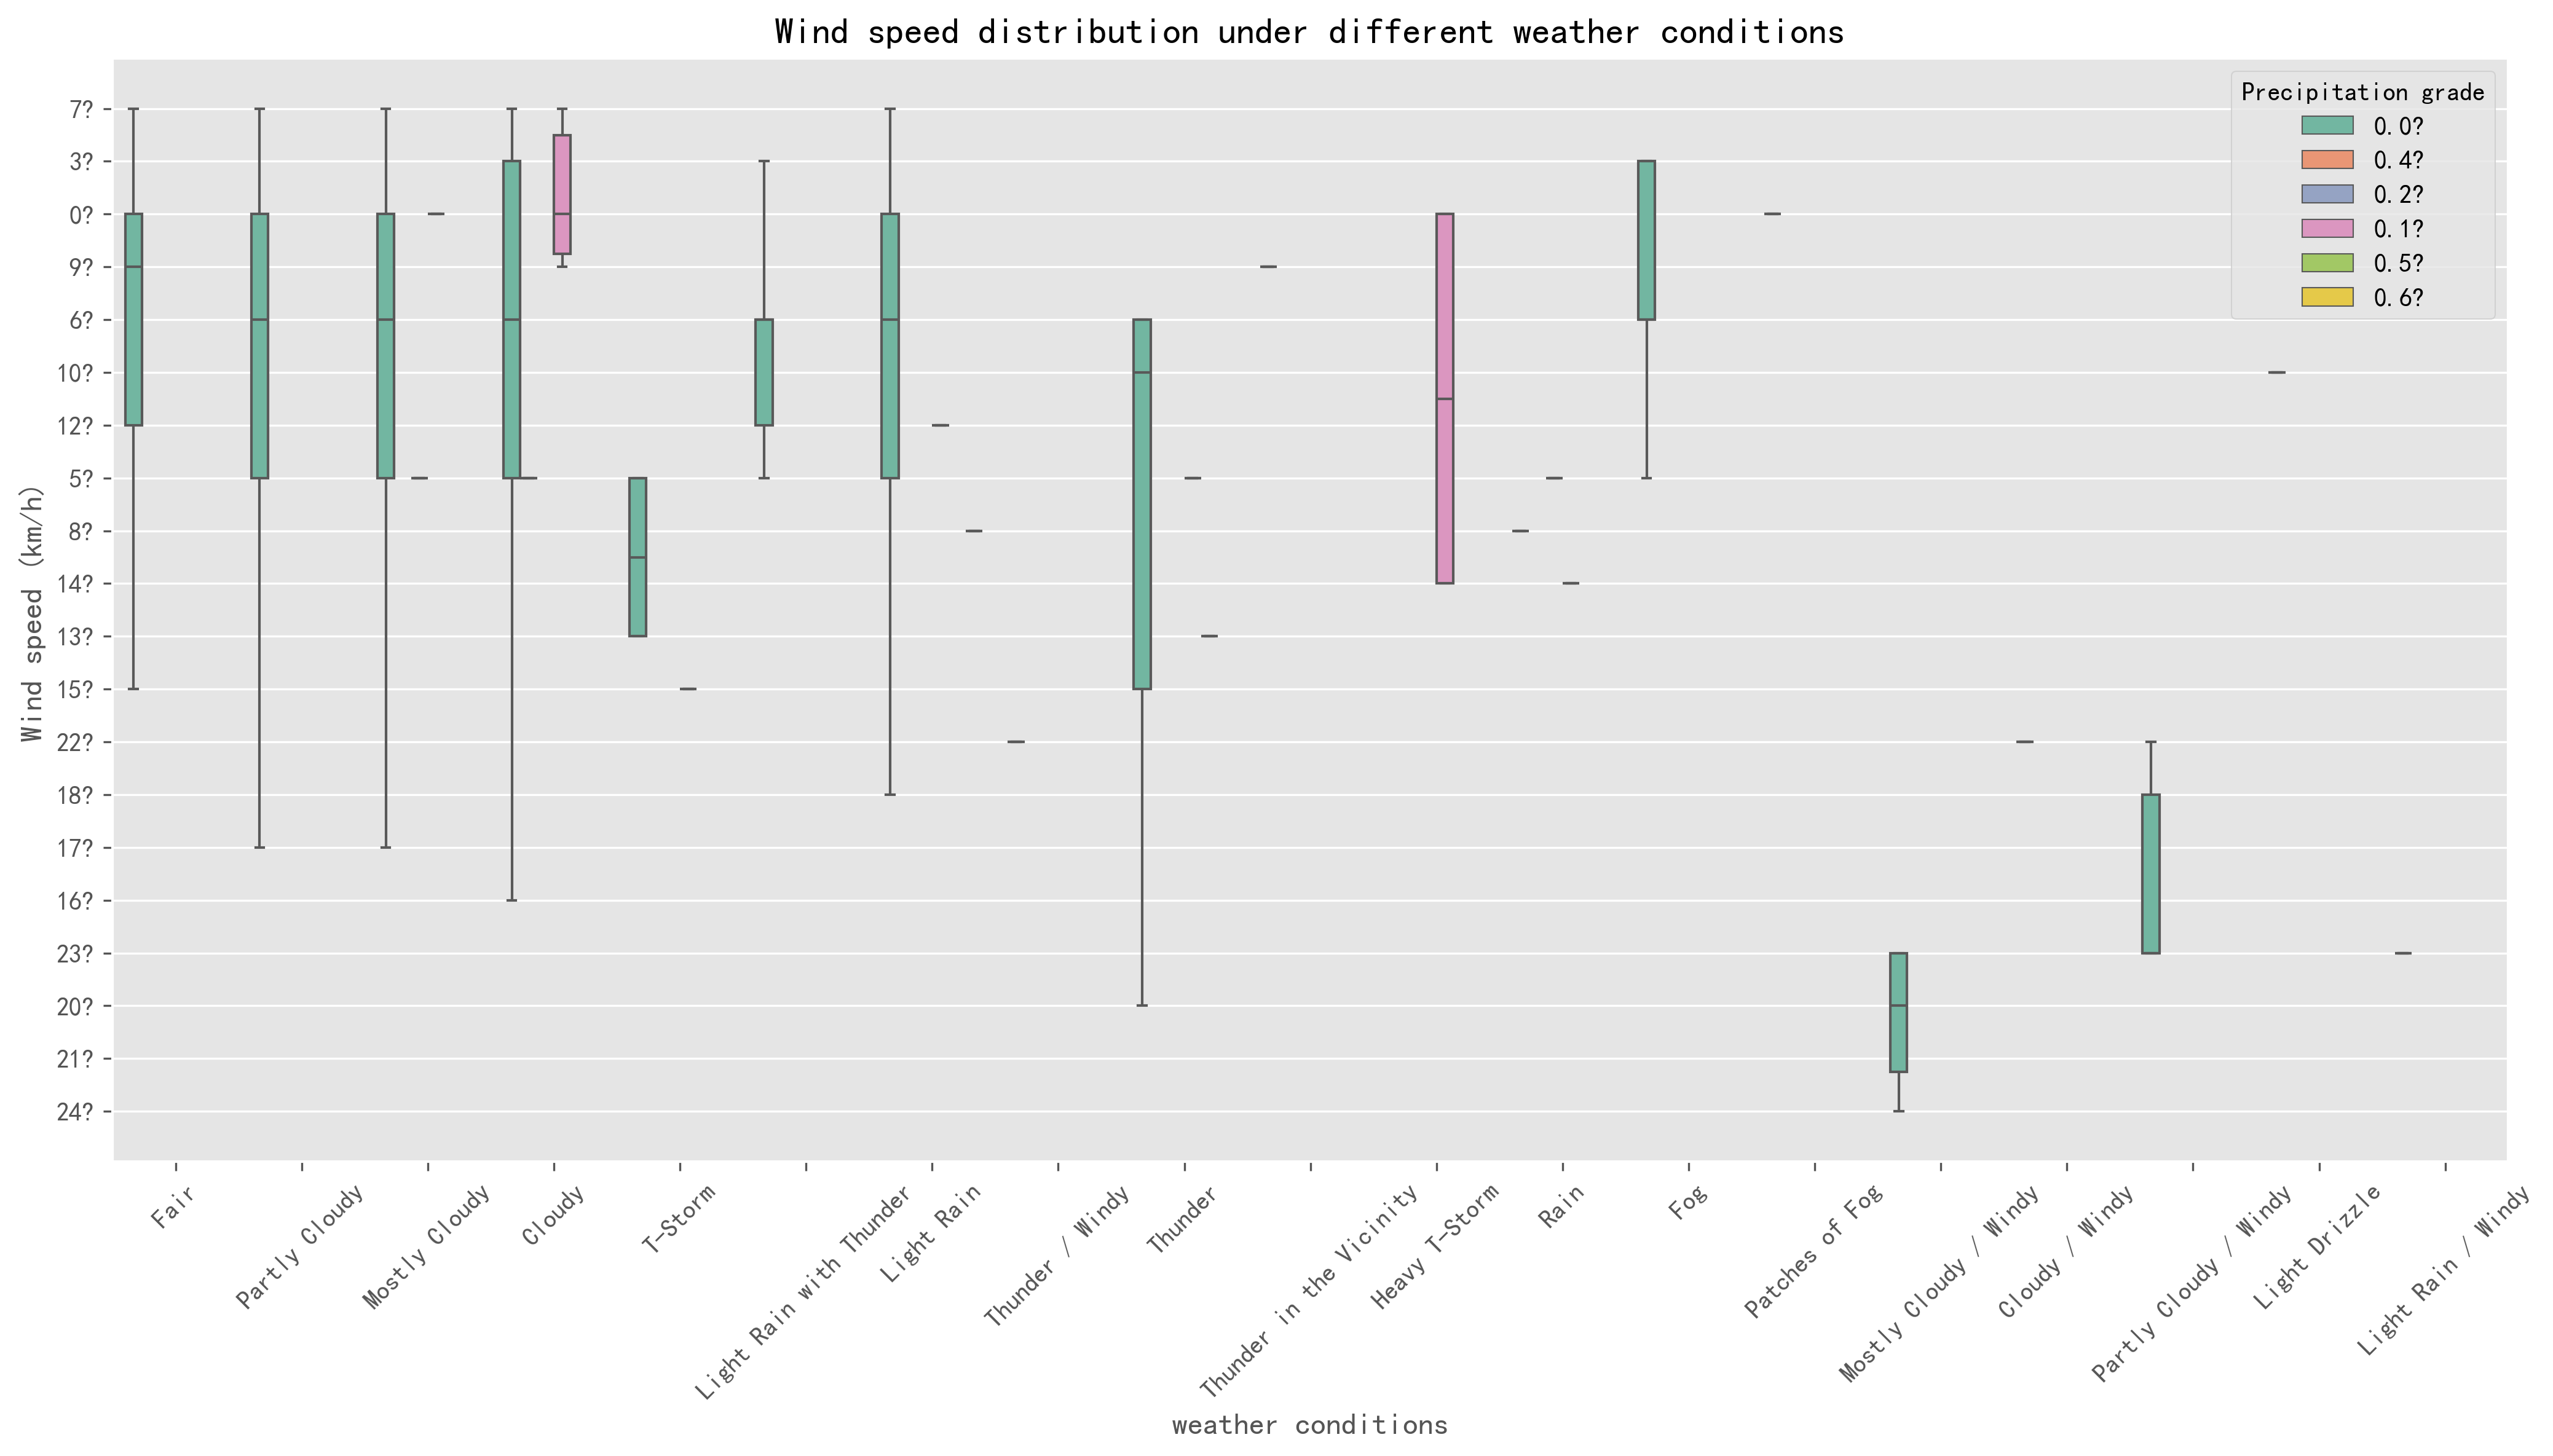

In [48]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Condition',
    y='Wind_Speed',
    hue='Precip',  
    data=Hourly_Weather_df,
    palette='Set2',
    showfliers=False  
)
plt.title('Wind speed distribution under different weather conditions')
plt.xlabel('weather conditions')
plt.ylabel('Wind speed (km/h)')
plt.xticks(rotation=45)
plt.legend(title='Precipitation grade')
plt.tight_layout()
plt.show()

# Comparison of factors in different documents

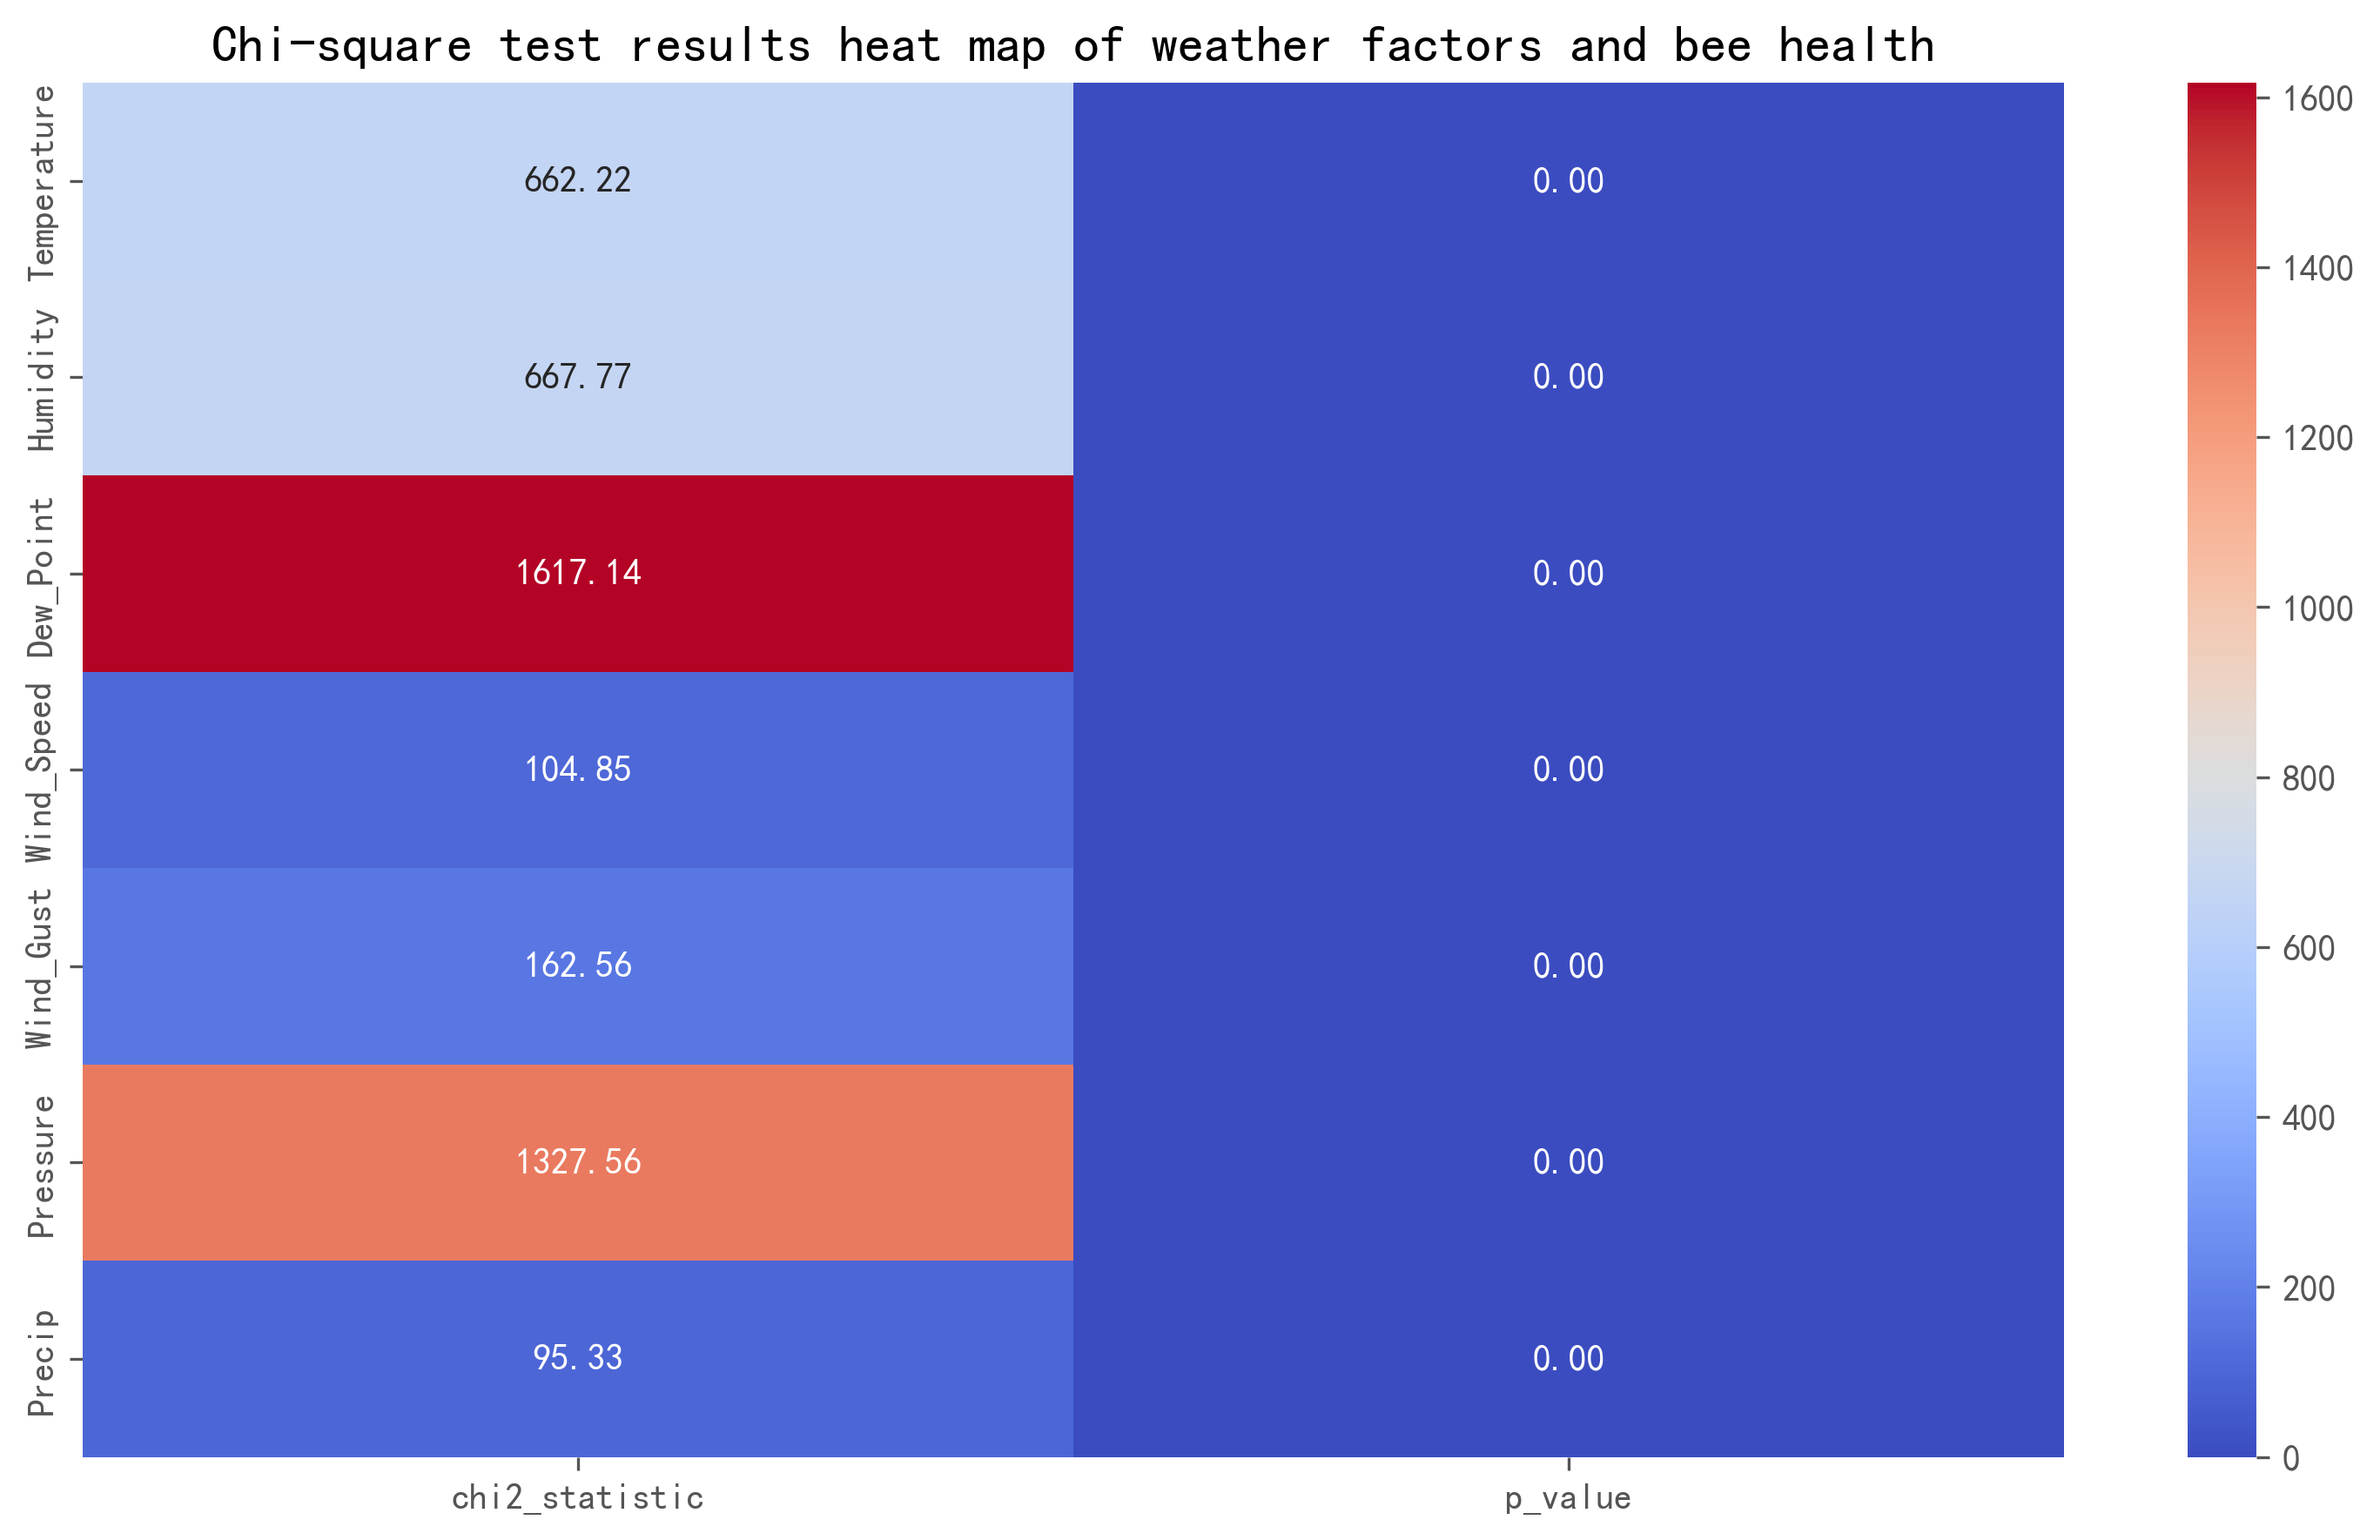

Chi-square test results of weather factors and bee health:
              chi2_statistic        p_value
Temperature      662.216497  2.618541e-101
Humidity         667.771957   4.943668e-94
Dew_Point       1617.139671  1.151329e-300
Wind_Speed       104.845753   7.036622e-14
Wind_Gust        162.561094   8.051475e-25
Pressure        1327.559515  4.416350e-202
Precip            95.330960   5.086378e-19


In [49]:
# Set font to support Chinese characters
try:
    # Try using a Chinese font installed on the system
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'WenQuanYi Micro Hei']
    plt.rcParams['axes.unicode_minus'] = False
except:
    try:
        # Path to SimHei font on Windows systems
        font_path = 'C:/Windows/Fonts/simhei.ttf'
        font_prop = fm.FontProperties(fname=font_path)
        plt.rcParams['font.family'] = font_prop.get_name()
    except:
        # If all methods fail, fall back to English font
        plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
        plt.rcParams['axes.unicode_minus'] = False
        print("Unable to load Chinese fonts. English will be used.")

# Convert date columns to datetime type
HCC_Inspections_df['InsptDate'] = pd.to_datetime(HCC_Inspections_df['InsptDate'])
Weather_Observations_df['Date'] = pd.to_datetime(Weather_Observations_df['Date'])

# Extract numeric part from Hourly_Weather_df columns by converting to string first
Hourly_Weather_df['Temperature'] = pd.to_numeric(Hourly_Weather_df['Temperature'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
Hourly_Weather_df['Humidity'] = pd.to_numeric(Hourly_Weather_df['Humidity'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
Hourly_Weather_df['Dew_Point'] = pd.to_numeric(Hourly_Weather_df['Dew_Point'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
Hourly_Weather_df['Wind_Speed'] = pd.to_numeric(Hourly_Weather_df['Wind_Speed'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
Hourly_Weather_df['Wind_Gust'] = pd.to_numeric(Hourly_Weather_df['Wind_Gust'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
Hourly_Weather_df['Pressure'] = pd.to_numeric(Hourly_Weather_df['Pressure'].astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
Hourly_Weather_df['Precip'] = pd.to_numeric(Hourly_Weather_df['Precip'].astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

# Merge datasets
merged_data = pd.merge(HCC_Inspections_df, Weather_Observations_df, left_on='InsptDate', right_on='Date', how='left')
merged_data = pd.merge(merged_data, Hourly_Weather_df, on='ObsID', how='left')

# Define columns used for analysis
weather_cols = ['Temperature', 'Humidity', 'Dew_Point', 'Wind_Speed', 'Wind_Gust', 'Pressure', 'Precip']
bee_health_col = 'Healthy'  # Column name representing bee health status

# Create empty DataFrame to store chi-square test results
correlation_results = pd.DataFrame(index=weather_cols, columns=['chi2_statistic', 'p_value'])

# Perform chi-square test
for col in weather_cols:
    temp_df = merged_data[[col, bee_health_col]].dropna()
    if not temp_df.empty:
        contingency_table = pd.crosstab(temp_df[col], temp_df[bee_health_col])
        if not contingency_table.empty:
            chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)
            correlation_results.loc[col, 'chi2_statistic'] = chi2_statistic
            correlation_results.loc[col, 'p_value'] = p_value

# Convert to numeric type
correlation_results = correlation_results.astype(float)

# Set figure resolution
plt.rcParams['figure.dpi'] = 300

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Chi-square test results heat map of weather factors and bee health')
plt.tight_layout()
plt.show()

# Print results
print("Chi-square test results of weather factors and bee health:\n", correlation_results)


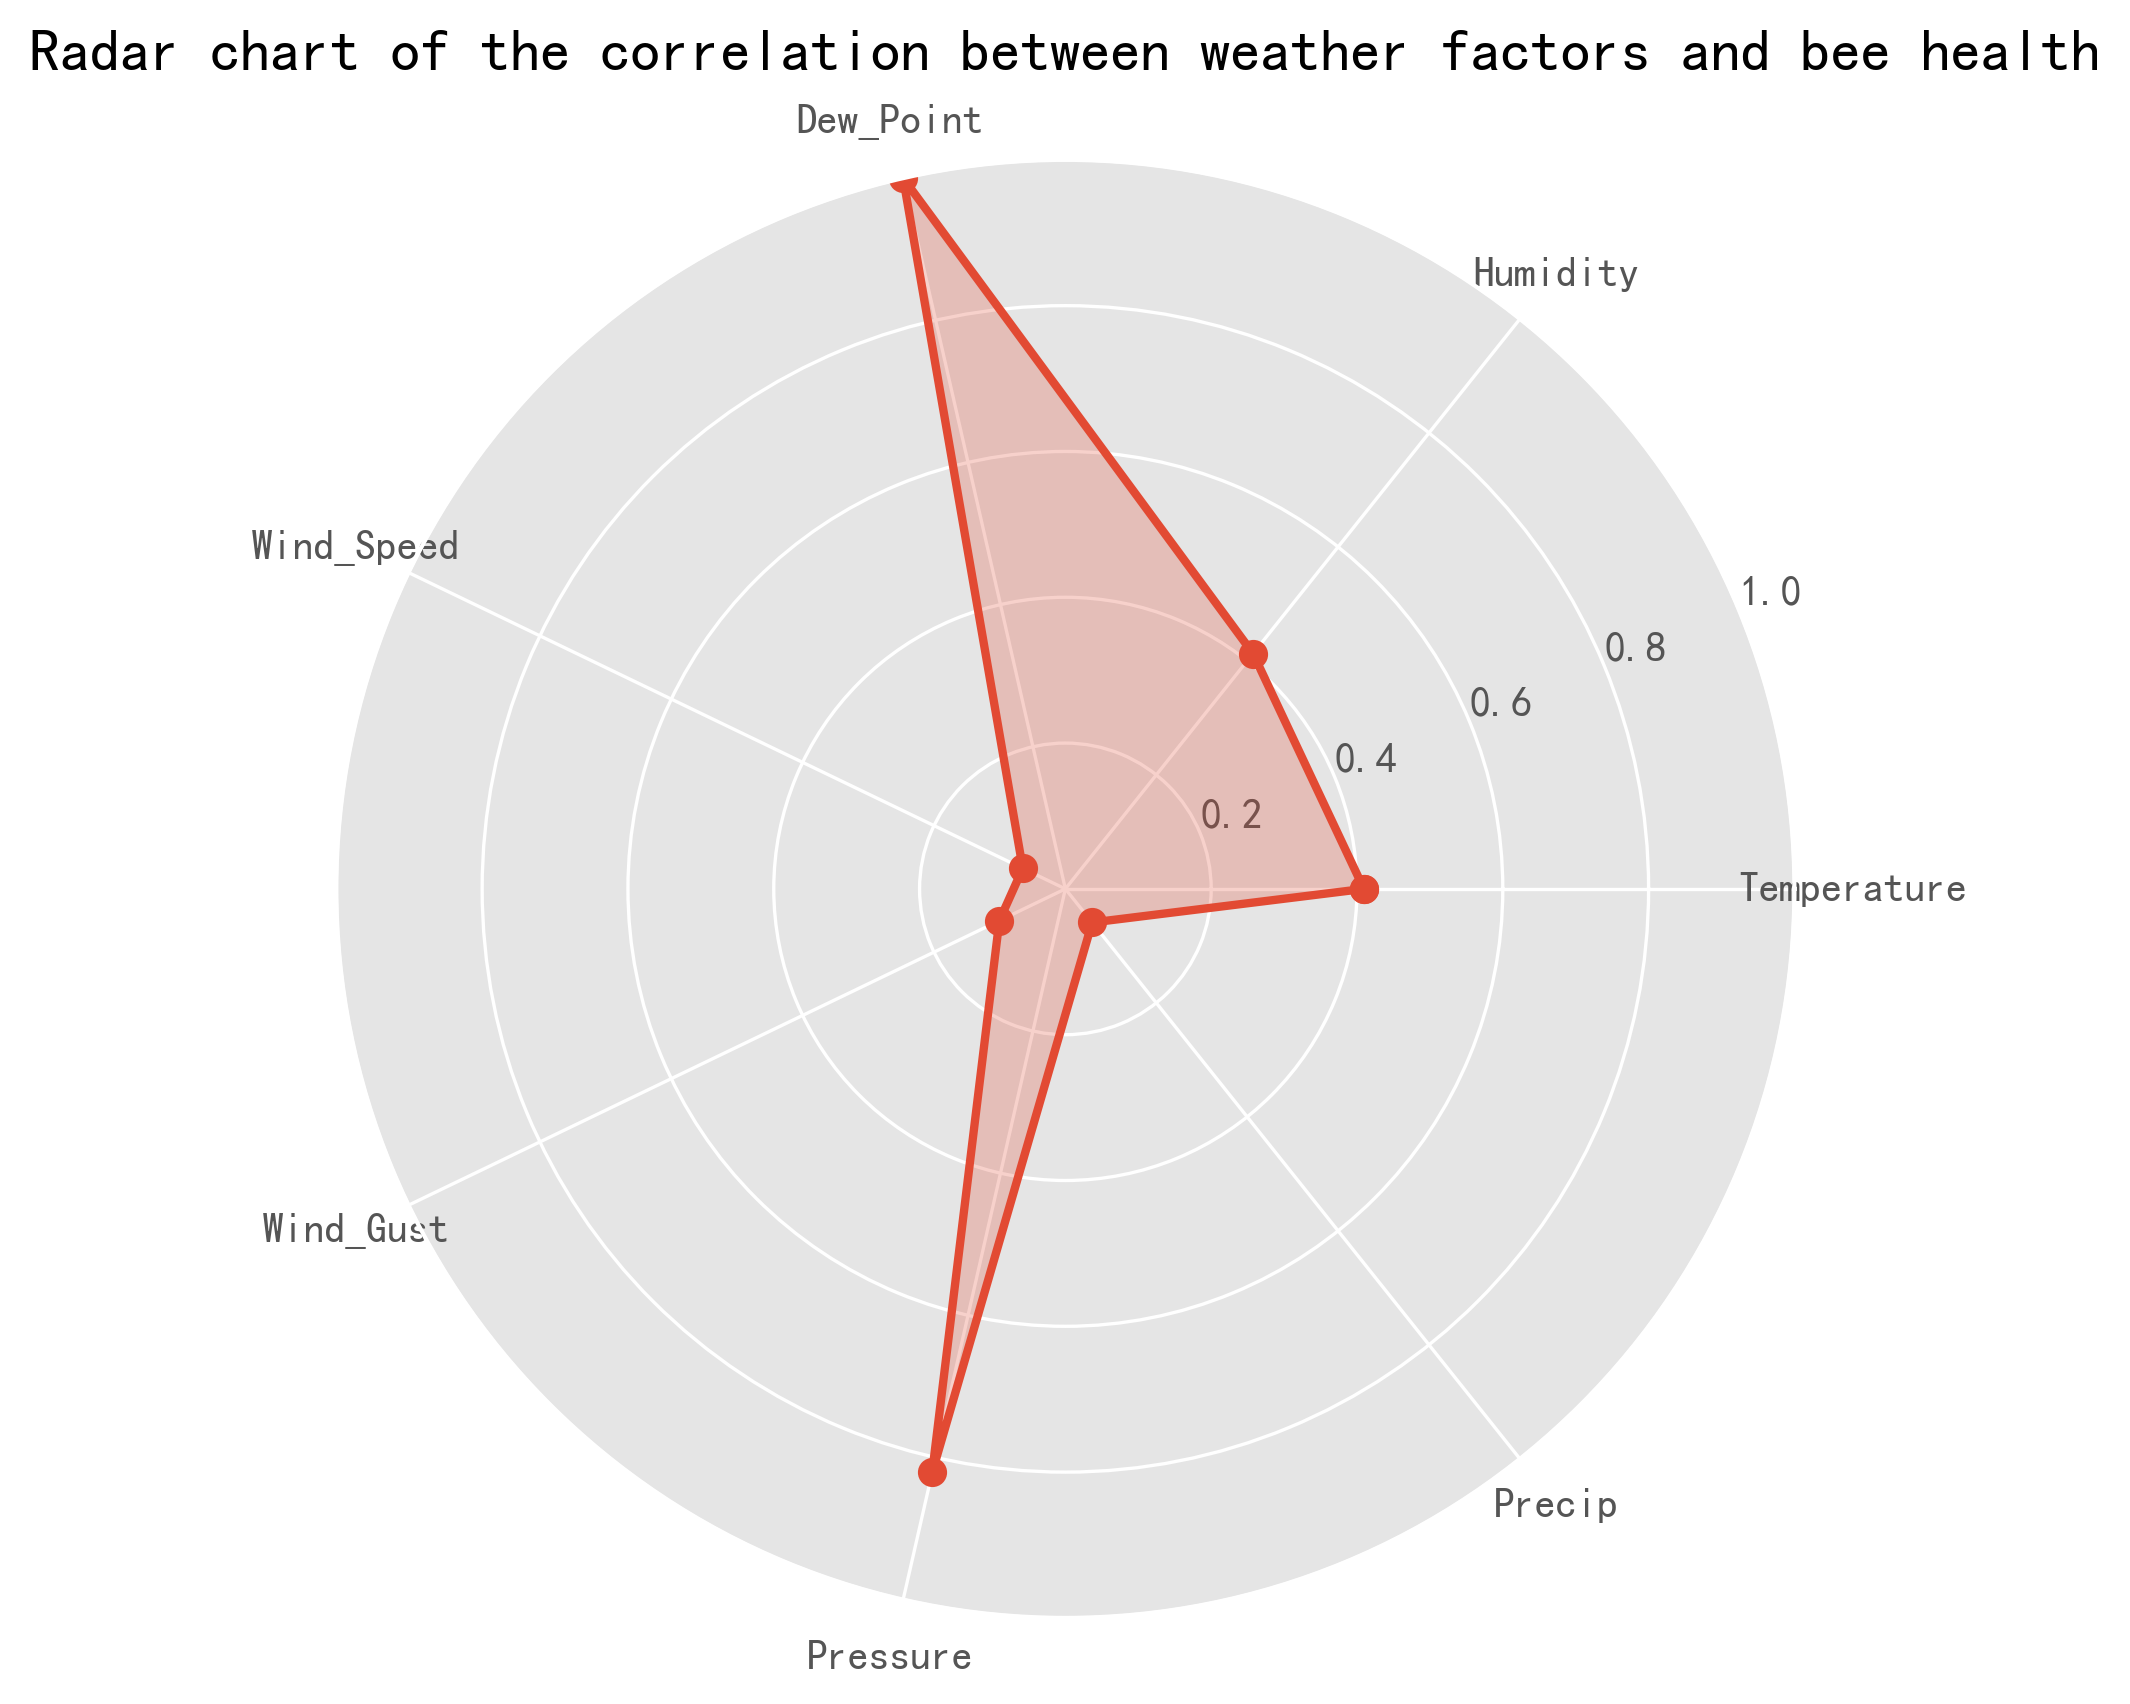

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Convert date columns to datetime format
HCC_Inspections_df['InsptDate'] = pd.to_datetime(HCC_Inspections_df['InsptDate'])
Weather_Observations_df['Date'] = pd.to_datetime(Weather_Observations_df['Date'])

# Convert weather columns to string type
for col in ['Temperature', 'Humidity', 'Dew_Point', 'Wind_Speed', 'Wind_Gust', 'Pressure', 'Precip']:
    Hourly_Weather_df[col] = Hourly_Weather_df[col].astype(str)

# Extract numeric values and convert to numeric type
Hourly_Weather_df['Temperature'] = pd.to_numeric(Hourly_Weather_df['Temperature'].str.extract(r'(\d+)').iloc[:, 0], errors='coerce')
Hourly_Weather_df['Humidity'] = pd.to_numeric(Hourly_Weather_df['Humidity'].str.extract(r'(\d+)').iloc[:, 0], errors='coerce')
Hourly_Weather_df['Dew_Point'] = pd.to_numeric(Hourly_Weather_df['Dew_Point'].str.extract(r'(\d+)').iloc[:, 0], errors='coerce')
Hourly_Weather_df['Wind_Speed'] = pd.to_numeric(Hourly_Weather_df['Wind_Speed'].str.extract(r'(\d+)').iloc[:, 0], errors='coerce')
Hourly_Weather_df['Wind_Gust'] = pd.to_numeric(Hourly_Weather_df['Wind_Gust'].str.extract(r'(\d+)').iloc[:, 0], errors='coerce')
Hourly_Weather_df['Pressure'] = pd.to_numeric(Hourly_Weather_df['Pressure'].str.extract(r'(\d+\.?\d*)').iloc[:, 0], errors='coerce')
Hourly_Weather_df['Precip'] = pd.to_numeric(Hourly_Weather_df['Precip'].str.extract(r'(\d+\.?\d*)').iloc[:, 0], errors='coerce')

# Merge datasets
merged_data = pd.merge(HCC_Inspections_df, Weather_Observations_df, left_on='InsptDate', right_on='Date', how='left')
merged_data = pd.merge(merged_data, Hourly_Weather_df, on='ObsID', how='left')

# Define columns
weather_cols = ['Temperature', 'Humidity', 'Dew_Point', 'Wind_Speed', 'Wind_Gust', 'Pressure', 'Precip']
bee_health_col = 'Healthy'

# Chi-square test
correlation_results = pd.DataFrame(index=weather_cols, columns=['chi2_statistic', 'p_value'])
for col in weather_cols:
    contingency_table = pd.crosstab(merged_data[col].dropna(), merged_data[bee_health_col])
    chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)
    correlation_results.loc[col, 'chi2_statistic'] = chi2_statistic
    correlation_results.loc[col, 'p_value'] = p_value

correlation_results = correlation_results.astype(float)

# Normalized correlation coefficient
correlation_coef = correlation_results['chi2_statistic'] / correlation_results['chi2_statistic'].max()

# Configure minus sign and Chinese font display (optional)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']  # Use SimHei to avoid garbled Chinese (must be installed on system)

# Radar chart plotting
angles = np.linspace(0, 2 * np.pi, len(weather_cols), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Close the polygon
correlation_coef = np.concatenate((correlation_coef.values, [correlation_coef.values[0]]))  # Close the value loop

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, correlation_coef, 'o-', linewidth=2)
ax.fill(angles, correlation_coef, alpha=0.25)
ax.set_thetagrids(angles[:-1] * 180 / np.pi, weather_cols)  # Exclude last angle to match number of labels
ax.set_title('Radar chart of the correlation between weather factors and bee health', va='bottom')
ax.set_rlim(0, 1)

plt.tight_layout()
plt.show()
